In [1131]:
import pandas as pd
import numpy as np
import imblearn
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler 
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE 
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
import json


In [1132]:
samplesheet = pd.read_csv("../data/TCGA/GDCdata/TCGA-COAD/Expression/clinical_data.csv",index_col=0)
samplesheet

ID_barcode  gender Sample_Group   t    n   m  \
TCGA.AA.3678.01A.01R.0905.07  TCGA-AA-3678  FEMALE           G1  T2   N1  M0   
TCGA.AA.3842.01A.01R.1022.07  TCGA-AA-3842    MALE           G1  T2   N1  M0   
TCGA.AA.3955.01A.02R.1022.07  TCGA-AA-3955    MALE           G1  T2  N2a  M0   
TCGA.AA.3976.01A.01R.1022.07  TCGA-AA-3976    MALE           G1  T2   N1  M0   
TCGA.AA.A01C.01A.01R.A00A.07  TCGA-AA-A01C    MALE           G1  T2   N1  M0   
...                                    ...     ...          ...  ..  ...  ..   
TCGA.F4.6856.01A.11R.1928.07  TCGA-F4-6856    MALE           G2  T2   N0  M0   
TCGA.G4.6306.01A.11R.1774.07  TCGA-G4-6306    MALE           G2  T2   N0  M0   
TCGA.G4.6628.01A.11R.1839.07  TCGA-G4-6628    MALE           G2  T2   N0  M0   
TCGA.QG.A5Z2.01A.11R.A28H.07  TCGA-QG-A5Z2    MALE           G2  T2   N0  M0   
TCGA.QL.A97D.01A.12R.A41B.07  TCGA-QL-A97D  FEMALE           G2  T2   N0  MX   

                                X                            ID  \
TCGA.AA.3678.01A.01R.0905.07  135  TCGA.AA.3678.01A.01R.0905.07   
TCGA.AA.3842.01A.01R.1022.07  162  TCGA.AA.3842.01A.01R.1022.07   
TCGA.AA.3955.01A.02R.1022.07  192  TCGA.AA.3955.01A.02R.1022.07   
TCGA.AA.3976.01A.01R.1022.07  201  TCGA.AA.3976.01A.01R.1022.07   
TCGA.AA.A01C.01A.01R.A00A.07  227  TCGA.AA.A01C.01A.01R.A00A.07   
...                           ...                           ...   
TCGA.F4.6856.01A.11R.1928.07  435  TCGA.F4.6856.01A.11R.1928.07   
TCGA.G4.6306.01A.11R.1774.07  445  TCGA.G4.6306.01A.11R.1774.07   
TCGA.G4.6628.01A.11R.1839.07  462  TCGA.G4.6628.01A.11R.1839.07   
TCGA.QG.A5Z2.01A.11R.A28H.07  476  TCGA.QG.A5Z2.01A.11R.A28H.07   
TCGA.QL.A97D.01A.12R.A41B.07  477  TCGA.QL.A97D.01A.12R.A41B.07   

                             SSP.nearestCMS ajcc_tumor_pathologic_pt  \
TCGA.AA.3678.01A.01R.0905.07           CMS2                       T2   
TCGA.AA.3842.01A.01R.1022.07           CMS4                       T2   
TCGA.AA.3955.01A.02R.1022.07           CMS2                       T2   
TCGA.AA.3976.01A.01R.1022.07           CMS2                       T2   
TCGA.AA.A01C.01A.01R.A00A.07           CMS4                       T2   
...                                     ...                      ...   
TCGA.F4.6856.01A.11R.1928.07           CMS3                       T2   
TCGA.G4.6306.01A.11R.1774.07           CMS2                       T2   
TCGA.G4.6628.01A.11R.1839.07           CMS1                       T2   
TCGA.QG.A5Z2.01A.11R.A28H.07           CMS3                       T2   
TCGA.QL.A97D.01A.12R.A41B.07           CMS2                       T2   

                             ajcc_nodes_pathologic_pn  \
TCGA.AA.3678.01A.01R.0905.07                       N1   
TCGA.AA.3842.01A.01R.1022.07                       N1   
TCGA.AA.3955.01A.02R.1022.07                      N2a   
TCGA.AA.3976.01A.01R.1022.07                       N1   
TCGA.AA.A01C.01A.01R.A00A.07                       N1   
...                                               ...   
TCGA.F4.6856.01A.11R.1928.07                       N0   
TCGA.G4.6306.01A.11R.1774.07                       N0   
TCGA.G4.6628.01A.11R.1839.07                       N0   
TCGA.QG.A5Z2.01A.11R.A28H.07                       N0   
TCGA.QL.A97D.01A.12R.A41B.07                       N0   

                             ajcc_metastasis_pathologic_pm   batch  
TCGA.AA.3678.01A.01R.0905.07                            M0  FEMALE  
TCGA.AA.3842.01A.01R.1022.07                            M0    MALE  
TCGA.AA.3955.01A.02R.1022.07                            M0    MALE  
TCGA.AA.3976.01A.01R.1022.07                            M0    MALE  
TCGA.AA.A01C.01A.01R.A00A.07                            M0    MALE  
...                                                    ...     ...  
TCGA.F4.6856.01A.11R.1928.07                            M0    MALE  
TCGA.G4.6306.01A.11R.1774.07                            M0    MALE  
TCGA.G4.6628.01A.11R.1839.07                            M0    MALE  
TCGA.QG.A5Z2.01A.11R.A28H.

In [1133]:
data = pd.read_csv("../data/TCGA/GDCdata/TCGA-COAD/Expression/rna_seq_norm.csv",index_col=0)
X=data.T
X

ENSG00000000003  ENSG00000000005  \
TCGA.AA.3678.01A.01R.0905.07      5897.726463        29.825370   
TCGA.AA.3842.01A.01R.1022.07      6363.976084        37.083707   
TCGA.AA.3955.01A.02R.1022.07     10136.696026        96.948353   
TCGA.AA.3976.01A.01R.1022.07     11162.495035        63.674947   
TCGA.AA.A01C.01A.01R.A00A.07      5702.880222        22.983900   
...                                       ...              ...   
TCGA.F4.6856.01A.11R.1928.07      1580.774666        13.600311   
TCGA.G4.6306.01A.11R.1774.07      7041.133017        31.241257   
TCGA.G4.6628.01A.11R.1839.07      1741.927334         3.382383   
TCGA.QG.A5Z2.01A.11R.A28H.07      1513.175706        12.755064   
TCGA.QL.A97D.01A.12R.A41B.07      3569.221332       120.730529   

                              ENSG00000000419  ENSG00000000457  \
TCGA.AA.3678.01A.01R.0905.07      2168.593058       645.574952   
TCGA.AA.3842.01A.01R.1022.07      2006.640565       267.826769   
TCGA.AA.3955.01A.02R.1022.07      3255.227379       546.266679   
TCGA.AA.3976.01A.01R.1022.07      3012.101835       506.631099   
TCGA.AA.A01C.01A.01R.A00A.07      1709.427573       215.474064   
...                                       ...              ...   
TCGA.F4.6856.01A.11R.1928.07       915.405581       438.348501   
TCGA.G4.6306.01A.11R.1774.07      2858.036397       217.611516   
TCGA.G4.6628.01A.11R.1839.07       861.943979       356.277694   
TCGA.QG.A5Z2.01A.11R.A28H.07       808.671029       480.865896   
TCGA.QL.A97D.01A.12R.A41B.07      2367.252197       444.234985   

                              ENSG00000000460  ENSG00000000938  \
TCGA.AA.3678.01A.01R.0905.07       424.289946       201.080723   
TCGA.AA.3842.01A.01R.1022.07       379.077889       164.816474   
TCGA.AA.3955.01A.02R.1022.07       494.063720        85.762004   
TCGA.AA.3976.01A.01R.1022.07       373.744253        99.665134   
TCGA.AA.A01C.01A.01R.A00A.07       209.728089        97.681576   
...                                       ...              ...   
TCGA.F4.6856.01A.11R.1928.07       212.374095        78.463336   
TCGA.G4.6306.01A.11R.1774.07       123.887744        39.859535   
TCGA.G4.6628.01A.11R.1839.07       301.595833       438.018621   
TCGA.QG.A5Z2.01A.11R.A28H.07       214.285068       115.645910   
TCGA.QL.A97D.01A.12R.A41B.07       386.871309        87.379554   

                              ENSG00000000971  ENSG00000001036  \
TCGA.AA.3678.01A.01R.0905.07       470.471165      2116.639188   
TCGA.AA.3842.01A.01R.1022.07       566.556628      3735.153332   
TCGA.AA.3955.01A.02R.1022.07       361.691931      3788.443319   
TCGA.AA.3976.01A.01R.1022.07       454.030056      2098.504771   
TCGA.AA.A01C.01A.01R.A00A.07       407.964227      2714.973204   
...                                       ...              ...   
TCGA.F4.6856.01A.11R.1928.07       281.421830      1055.593407   
TCGA.G4.6306.01A.11R.1774.07        82.950924      1911.103117   
TCGA.G4.6628.01A.11R.1839.07      1027.117024      1571.680715   
TCGA.QG.A5Z2.01A.11R.A28H.07       178.145721      1096.085128   
TCGA.QL.A97D.01A.12R.A41B.07       329.507632      1013.869636   

                              ENSG00000001084  ENSG00000001167  ...  \
TCGA.AA.3678.01A.01R.0905.07       949.601308      1148.757814  ...   
TCGA.AA.3842.01A.01R.1022.07      2173.517245       846.744633  ...   
TCGA.AA.3955.01A.02R.1022.07      1590.325862       822.196606  ...   
TCGA.AA.3976.01A.01R.1022.07      1788.435464       617.370137  ...   
TCGA.AA.A01C.01A.01R.A00A.07      1221.019695       764.214680  ...   
...                                       ...              ...  ...   
TCGA.F4.6856.01A.11R.1928.07       945.744737       948.883271  ...   
TCGA.G4.6306.01A.11R.1774.07      1741.969414       555.878922  ...   
TCGA.G4.6628.01A.11R.1839.07      1199.054835       904.787499  ...   
TCGA.QG.A5Z2.01A.11R.A28H.07       925.167276       937.497171  ...   
TCGA.QL.A97D.01A.12R.A41B.07      1239.989246      1259.332812  ...   

     

In [1134]:
# Map G1 to 1 and G2 to 0 in the 'Sample_group' column: 
# 1 mean metastasis in early stage
Y = np.array(samplesheet['Sample_Group'].map({'G1': 1, 'G2': 0}))
print(Y)

[1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


# TEST 1: using the 57 ENSG sites

In [1135]:
features = pd.read_csv("../data/TCGA/GDCdata/TCGA-COAD/Expression/DEs_WCGNA.csv")
selected_features = list(set(features["ENSG"].tolist()))      # List of CpG site names
print(len(selected_features),f"Number of unique genes:",selected_features)
X1 = X[selected_features]

57 Number of unique genes: ['ENSG00000102385', 'ENSG00000163629', 'ENSG00000168875', 'ENSG00000196169', 'ENSG00000196228', 'ENSG00000224099', 'ENSG00000275765', 'ENSG00000164816', 'ENSG00000275896', 'ENSG00000256377', 'ENSG00000183091', 'ENSG00000184564', 'ENSG00000238133', 'ENSG00000042781', 'ENSG00000253958', 'ENSG00000240563', 'ENSG00000162992', 'ENSG00000173727', 'ENSG00000146205', 'ENSG00000112299', 'ENSG00000184669', 'ENSG00000264006', 'ENSG00000278505', 'ENSG00000236735', 'ENSG00000283525', 'ENSG00000145358', 'ENSG00000253910', 'ENSG00000102886', 'ENSG00000135773', 'ENSG00000137225', 'ENSG00000177238', 'ENSG00000241743', 'ENSG00000172023', 'ENSG00000145040', 'ENSG00000100884', 'ENSG00000140297', 'ENSG00000182601', 'ENSG00000176177', 'ENSG00000021826', 'ENSG00000230847', 'ENSG00000186474', 'ENSG00000164822', 'ENSG00000248810', 'ENSG00000285427', 'ENSG00000197520', 'ENSG00000225783', 'ENSG00000235034', 'ENSG00000173237', 'ENSG00000267147', 'ENSG00000104327', 'ENSG00000153292', 'EN

In [1136]:
threshold = len(X1) / 2  # More than half of the rows
X1 = X1.loc[:, (X1 == 0.0).sum(axis=0) <= threshold]
X1= X1.loc[:, ~X1.columns.duplicated()]
X1

ENSG00000102385  ENSG00000163629  \
TCGA.AA.3678.01A.01R.0905.07         9.621087       607.090603   
TCGA.AA.3842.01A.01R.1022.07        12.361236       121.552149   
TCGA.AA.3955.01A.02R.1022.07         0.000000       160.337660   
TCGA.AA.3976.01A.01R.1022.07         8.305428       182.719413   
TCGA.AA.A01C.01A.01R.A00A.07        22.983900       117.792488   
...                                       ...              ...   
TCGA.F4.6856.01A.11R.1928.07       153.788138       818.111045   
TCGA.G4.6306.01A.11R.1774.07         5.386424        26.932118   
TCGA.G4.6628.01A.11R.1839.07         5.637305        88.505693   
TCGA.QG.A5Z2.01A.11R.A28H.07        56.122280      1520.828744   
TCGA.QL.A97D.01A.12R.A41B.07         8.671253      1665.547686   

                              ENSG00000168875  ENSG00000196169  \
TCGA.AA.3678.01A.01R.0905.07         3.848435        16.355848   
TCGA.AA.3842.01A.01R.1022.07         2.060206        39.143912   
TCGA.AA.3955.01A.02R.1022.07         0.000000        14.915131   
TCGA.AA.3976.01A.01R.1022.07         8.305428         0.000000   
TCGA.AA.A01C.01A.01R.A00A.07         0.000000         5.745975   
...                                       ...              ...   
TCGA.F4.6856.01A.11R.1928.07         3.138533       413.240234   
TCGA.G4.6306.01A.11R.1774.07         4.309139         9.695563   
TCGA.G4.6628.01A.11R.1839.07         0.000000        28.186526   
TCGA.QG.A5Z2.01A.11R.A28H.07         2.976181       140.305699   
TCGA.QL.A97D.01A.12R.A41B.07        14.007409        14.007409   

                              ENSG00000196228  ENSG00000224099  \
TCGA.AA.3678.01A.01R.0905.07         0.000000        41.370675   
TCGA.AA.3842.01A.01R.1022.07         0.000000         2.060206   
TCGA.AA.3955.01A.02R.1022.07         0.000000         7.457566   
TCGA.AA.3976.01A.01R.1022.07         2.768476        19.379332   
TCGA.AA.A01C.01A.01R.A00A.07         0.000000        25.856888   
...                                       ...              ...   
TCGA.F4.6856.01A.11R.1928.07         1.046178        30.339156   
TCGA.G4.6306.01A.11R.1774.07         2.154569         0.000000   
TCGA.G4.6628.01A.11R.1839.07         1.127461         0.000000   
TCGA.QG.A5Z2.01A.11R.A28H.07        40.816203         2.551013   
TCGA.QL.A97D.01A.12R.A41B.07        10.672312        36.019053   

                              ENSG00000275765  ENSG00000164816  \
TCGA.AA.3678.01A.01R.0905.07        31.749588       437.759468   
TCGA.AA.3842.01A.01R.1022.07        49.444942         2.060206   
TCGA.AA.3955.01A.02R.1022.07        93.219570        11.186348   
TCGA.AA.3976.01A.01R.1022.07        22.147808        19.379332   
TCGA.AA.A01C.01A.01R.A00A.07        89.062613       229.839001   
...                                       ...              ...   
TCGA.F4.6856.01A.11R.1928.07        39.754757         0.000000   
TCGA.G4.6306.01A.11R.1774.07        31.241257        90.491918   
TCGA.G4.6628.01A.11R.1839.07        15.784455         7.328497   
TCGA.QG.A5Z2.01A.11R.A28H.07        27.210802       387.328763   
TCGA.QL.A97D.01A.12R.A41B.07        35.352033         4.669136   

                              ENSG00000275896  ENSG00000256377  ...  \
TCGA.AA.3678.01A.01R.0905.07       181.838548         0.000000  ...   
TCGA.AA.3842.01A.01R.1022.07        30.903089         0.000000  ...   
TCGA.AA.3955.01A.02R.1022.07         3.728783         0.000000  ...   
TCGA.AA.3976.01A.01R.1022.07       191.024841         0.000000  ...   
TCGA.AA.A01C.01A.01R.A00A.07         2.872988         0.000000  ...   
...                                       ...              ...  ...   
TCGA.F4.6856.01A.11R.1928.07         1.046178         9.415600  ...   
TCGA.G4.6306.01A.11R.1774.07       104.496619         0.000000  ...   
TCGA.G4.6628.01A.11R.1839.07        37.206215         1.127461  ...   
TCGA.QG.A5Z2.01A.11R.A28H.07         4.676857        64.625655  ...   
TCGA.QL.A97D.01A.12R.A41B.07         2.001058         3.335097  ...   

     

In [1137]:
X1['Outcome'] = Y
X1

ENSG00000102385  ENSG00000163629  \
TCGA.AA.3678.01A.01R.0905.07         9.621087       607.090603   
TCGA.AA.3842.01A.01R.1022.07        12.361236       121.552149   
TCGA.AA.3955.01A.02R.1022.07         0.000000       160.337660   
TCGA.AA.3976.01A.01R.1022.07         8.305428       182.719413   
TCGA.AA.A01C.01A.01R.A00A.07        22.983900       117.792488   
...                                       ...              ...   
TCGA.F4.6856.01A.11R.1928.07       153.788138       818.111045   
TCGA.G4.6306.01A.11R.1774.07         5.386424        26.932118   
TCGA.G4.6628.01A.11R.1839.07         5.637305        88.505693   
TCGA.QG.A5Z2.01A.11R.A28H.07        56.122280      1520.828744   
TCGA.QL.A97D.01A.12R.A41B.07         8.671253      1665.547686   

                              ENSG00000168875  ENSG00000196169  \
TCGA.AA.3678.01A.01R.0905.07         3.848435        16.355848   
TCGA.AA.3842.01A.01R.1022.07         2.060206        39.143912   
TCGA.AA.3955.01A.02R.1022.07         0.000000        14.915131   
TCGA.AA.3976.01A.01R.1022.07         8.305428         0.000000   
TCGA.AA.A01C.01A.01R.A00A.07         0.000000         5.745975   
...                                       ...              ...   
TCGA.F4.6856.01A.11R.1928.07         3.138533       413.240234   
TCGA.G4.6306.01A.11R.1774.07         4.309139         9.695563   
TCGA.G4.6628.01A.11R.1839.07         0.000000        28.186526   
TCGA.QG.A5Z2.01A.11R.A28H.07         2.976181       140.305699   
TCGA.QL.A97D.01A.12R.A41B.07        14.007409        14.007409   

                              ENSG00000196228  ENSG00000224099  \
TCGA.AA.3678.01A.01R.0905.07         0.000000        41.370675   
TCGA.AA.3842.01A.01R.1022.07         0.000000         2.060206   
TCGA.AA.3955.01A.02R.1022.07         0.000000         7.457566   
TCGA.AA.3976.01A.01R.1022.07         2.768476        19.379332   
TCGA.AA.A01C.01A.01R.A00A.07         0.000000        25.856888   
...                                       ...              ...   
TCGA.F4.6856.01A.11R.1928.07         1.046178        30.339156   
TCGA.G4.6306.01A.11R.1774.07         2.154569         0.000000   
TCGA.G4.6628.01A.11R.1839.07         1.127461         0.000000   
TCGA.QG.A5Z2.01A.11R.A28H.07        40.816203         2.551013   
TCGA.QL.A97D.01A.12R.A41B.07        10.672312        36.019053   

                              ENSG00000275765  ENSG00000164816  \
TCGA.AA.3678.01A.01R.0905.07        31.749588       437.759468   
TCGA.AA.3842.01A.01R.1022.07        49.444942         2.060206   
TCGA.AA.3955.01A.02R.1022.07        93.219570        11.186348   
TCGA.AA.3976.01A.01R.1022.07        22.147808        19.379332   
TCGA.AA.A01C.01A.01R.A00A.07        89.062613       229.839001   
...                                       ...              ...   
TCGA.F4.6856.01A.11R.1928.07        39.754757         0.000000   
TCGA.G4.6306.01A.11R.1774.07        31.241257        90.491918   
TCGA.G4.6628.01A.11R.1839.07        15.784455         7.328497   
TCGA.QG.A5Z2.01A.11R.A28H.07        27.210802       387.328763   
TCGA.QL.A97D.01A.12R.A41B.07        35.352033         4.669136   

                              ENSG00000275896  ENSG00000256377  ...  \
TCGA.AA.3678.01A.01R.0905.07       181.838548         0.000000  ...   
TCGA.AA.3842.01A.01R.1022.07        30.903089         0.000000  ...   
TCGA.AA.3955.01A.02R.1022.07         3.728783         0.000000  ...   
TCGA.AA.3976.01A.01R.1022.07       191.024841         0.000000  ...   
TCGA.AA.A01C.01A.01R.A00A.07         2.872988         0.000000  ...   
...                                       ...              ...  ...   
TCGA.F4.6856.01A.11R.1928.07         1.046178         9.415600  ...   
TCGA.G4.6306.01A.11R.1774.07       104.496619         0.000000  ...   
TCGA.G4.6628.01A.11R.1839.07        37.206215         1.127461  ...   
TCGA.QG.A5Z2.01A.11R.A28H.07         4.676857        64.625655  ...   
TCGA.QL.A97D.01A.12R.A41B.07         2.001058         3.335097  ...   

     

## Data splitting

In [1138]:
train, test = train_test_split(X1, test_size = 0.25, random_state = 42, stratify = X1['Outcome'])
X_train, y_train, X_test, y_test = train.drop(['Outcome'], axis = 1), train['Outcome'], \
                                   test.drop(['Outcome'], axis = 1), test['Outcome']

In [1139]:
y_train.shape, y_train.value_counts()

((70,),
 Outcome
 0    62
 1     8
 Name: count, dtype: int64)

## Normalization

In [1140]:
# normalizer = MinMaxScaler()
# X_train = pd.DataFrame(normalizer.fit_transform(X_train), columns = X_train.columns)
# X_test = pd.DataFrame(normalizer.transform(X_test), columns = X_test.columns)

In [1141]:
# # Deal with NAN
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='mean')  # Options: 'mean', 'median', 'most_frequent', 'constant'
# X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

## Oversampling

### Random Oversampling

In [1142]:
random_os = RandomOverSampler(random_state = 42)
X_random, y_random = random_os.fit_resample(X_train, y_train)
y_random.value_counts()

Outcome
1    62
0    62
Name: count, dtype: int64

In [1143]:
X_random.shape, y_random.shape

((124, 57), (124,))

### SMOTE

In [1144]:
smote_os = SMOTE(random_state = 42)
X_smote, y_smote = smote_os.fit_resample(X_train, y_train)
y_smote.value_counts()

Outcome
1    62
0    62
Name: count, dtype: int64

### BorderlineSMOTE

In [1145]:
smote_border = BorderlineSMOTE(random_state = 42, kind = 'borderline-2')
X_smoteborder, y_smoteborder = smote_border.fit_resample(X_train, y_train)
y_smoteborder.value_counts()

Outcome
1    62
0    62
Name: count, dtype: int64

In [1146]:
X_smoteborder.shape

(124, 57)

### SVM SMOTE

In [1147]:
smote_svm = SVMSMOTE(random_state = 42)
X_smotesvm, y_smotesvm = smote_svm.fit_resample(X_train, y_train)
y_smotesvm.value_counts()

Outcome
0    62
1    38
Name: count, dtype: int64

In [1148]:
X_smotesvm.shape

(100, 57)

In [1149]:
y_smotesvm.shape

(100,)

## Model building

In [1150]:
# Types for Oversampling
report_labels = ["No Oversampling",
                 "Random Oversampling", 
                 "SMOTE", 
                 "Borderline SMOTE", 
                 "SVM SMOTE"]

comparison_sets = [(X_train, y_train), 
                   (X_random, y_random), 
                   (X_smote, y_smote), 
                   (X_smoteborder, y_smoteborder), 
                   (X_smotesvm, y_smotesvm)]

In [1151]:
X_test[0:5]

ENSG00000102385  ENSG00000163629  \
TCGA.F4.6808.01A.11R.1839.07         5.166005        34.440036   
TCGA.AA.3556.01A.01R.0821.07       101.025702       147.278434   
TCGA.D5.6540.01A.11R.1723.07        10.364488        70.608076   
TCGA.D5.7000.01A.11R.A32Z.07        19.283552      2001.841180   
TCGA.A6.2684.01A.01R.A278.07        52.471158      1013.306655   

                              ENSG00000168875  ENSG00000196169  \
TCGA.F4.6808.01A.11R.1839.07        13.776015         7.749008   
TCGA.AA.3556.01A.01R.0821.07        34.080960         2.434354   
TCGA.D5.6540.01A.11R.1723.07         1.943342        38.866831   
TCGA.D5.7000.01A.11R.A32Z.07         0.000000        14.592958   
TCGA.A6.2684.01A.01R.A278.07         2.044331        23.169083   

                              ENSG00000196228  ENSG00000224099  \
TCGA.F4.6808.01A.11R.1839.07         0.861001       921.270971   
TCGA.AA.3556.01A.01R.0821.07        37.732491         2.434354   
TCGA.D5.6540.01A.11R.1723.07         4.534464        91.984833   
TCGA.D5.7000.01A.11R.A32Z.07         2.084708        16.156490   
TCGA.A6.2684.01A.01R.A278.07        69.507249        17.717534   

                              ENSG00000275765  ENSG00000164816  \
TCGA.F4.6808.01A.11R.1839.07        13.776015      2084.483198   
TCGA.AA.3556.01A.01R.0821.07        90.071108         2.434354   
TCGA.D5.6540.01A.11R.1723.07        22.024537         3.238903   
TCGA.D5.7000.01A.11R.A32Z.07        27.101208        21.368260   
TCGA.A6.2684.01A.01R.A278.07        28.620632        48.382497   

                              ENSG00000275896  ENSG00000256377  ...  \
TCGA.F4.6808.01A.11R.1839.07        16.359017        88.683093  ...   
TCGA.AA.3556.01A.01R.0821.07     34544.704351         9.737417  ...   
TCGA.D5.6540.01A.11R.1723.07       202.755301        39.514611  ...   
TCGA.D5.7000.01A.11R.A32Z.07       229.839094         1.042354  ...   
TCGA.A6.2684.01A.01R.A278.07         1.362887         1.362887  ...   

                              ENSG00000173237  ENSG00000267147  \
TCGA.F4.6808.01A.11R.1839.07        34.440036        26.691028   
TCGA.AA.3556.01A.01R.0821.07        59.641680        12.171771   
TCGA.D5.6540.01A.11R.1723.07         2.591122        47.935758   
TCGA.D5.7000.01A.11R.A32Z.07       230.360271         3.648240   
TCGA.A6.2684.01A.01R.A278.07        17.036090         7.495880   

                              ENSG00000104327  ENSG00000153292  \
TCGA.F4.6808.01A.11R.1839.07         2.583003         3.444004   
TCGA.AA.3556.01A.01R.0821.07        37.732491       182.576571   
TCGA.D5.6540.01A.11R.1723.07       188.504129       130.851664   
TCGA.D5.7000.01A.11R.A32Z.07         7.296479        62.541250   
TCGA.A6.2684.01A.01R.A278.07        19.761865        25.213414   

                              ENSG00000115386  ENSG00000160282  \
TCGA.F4.6808.01A.11R.1839.07     33291.461098         1.722002   
TCGA.AA.3556.01A.01R.0821.07     46817.501433         2.434354   
TCGA.D5.6540.01A.11R.1723.07        35.627928         0.000000   
TCGA.D5.7000.01A.11R.A32Z.07       149.577823         2.084708   
TCGA.A6.2684.01A.01R.A278.07       595.581719         7.495880   

                              ENSG00000200087  ENSG00000122711  \
TCGA.F4.6808.01A.11R.1839.07         6.027006       585.480617   
TCGA.AA.3556.01A.01R.0821.07         6.085886     13761.404721   
TCGA.D5.6540.01A.11R.1723.07        27.206782     17799.712932   
TCGA.D5.7000.01A.11R.A32Z.07        26.580031      3647.718412   
TCGA.A6.2684.01A.01R.A278.07     88872.513333       156.732031   

                              ENSG00000272983  ENSG00000175294  
TCGA.F4.6808.01A.11R.1839.07         6.027006         7.749008  
TCGA.AA.3556.01A.01R.0821.07         3.651531        15.823303  
TCGA.D5.6540.01A.11R.1723.07         3.238903        18.137854  
TCGA.D5.7000.01A.11R.A32Z.07        11.987073         5.732948  
TCGA.A6.2684.01A.01R.A278.07        29.983519        10.903098  

[5 rows x 57 columns]

In [1152]:
y_test[0:5]

TCGA.F4.6808.01A.11R.1839.07    0
TCGA.AA.3556.01A.01R.0821.07    0
TCGA.D5.6540.01A.11R.1723.07    0
TCGA.D5.7000.01A.11R.A32Z.07    0
TCGA.A6.2684.01A.01R.A278.07    0
Name: Outcome, dtype: int64

### Random Forest 

In [1153]:
rf = RandomForestClassifier(random_state = 42, max_depth = 5)
for i in range(0, len(comparison_sets)):
    if i < len(report_labels):
        print(f"{report_labels[i]}:")

    rf.fit(comparison_sets[i][0], comparison_sets[i][1])
    print(classification_report(y_test, rf.predict(X_test)))

No Oversampling:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        21
           1       0.00      0.00      0.00         3

    accuracy                           0.88        24
   macro avg       0.44      0.50      0.47        24
weighted avg       0.77      0.88      0.82        24

Random Oversampling:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        21
           1       1.00      0.33      0.50         3

    accuracy                           0.92        24
   macro avg       0.96      0.67      0.73        24
weighted avg       0.92      0.92      0.90        24

SMOTE:


c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.91      1.00      0.95        21
           1       1.00      0.33      0.50         3

    accuracy                           0.92        24
   macro avg       0.96      0.67      0.73        24
weighted avg       0.92      0.92      0.90        24

Borderline SMOTE:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        21
           1       1.00      0.33      0.50         3

    accuracy                           0.92        24
   macro avg       0.96      0.67      0.73        24
weighted avg       0.92      0.92      0.90        24

SVM SMOTE:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        21
           1       1.00      0.33      0.50         3

    accuracy                           0.92        24
   macro avg       0.96      0.67      0.73        24
weighted avg       0.92      0.92      0.90  

### XGBoost

In [1154]:
# Train the model on the resampled data
xg_clf = xgb.XGBClassifier(objective='binary:logistic')
for i in range(len(comparison_sets)):
    if i < len(report_labels):
        print(f"{report_labels[i]}:")
    # Extract and convert train data
    X_train = comparison_sets[i][0]
    y_train = comparison_sets[i][1]

    # Train the model
    xg_clf.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = xg_clf.predict(X_test)
    print(classification_report(y_test, y_pred))


No Oversampling:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.67      0.80         3

    accuracy                           0.96        24
   macro avg       0.98      0.83      0.89        24
weighted avg       0.96      0.96      0.95        24

Random Oversampling:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.67      0.80         3

    accuracy                           0.96        24
   macro avg       0.98      0.83      0.89        24
weighted avg       0.96      0.96      0.95        24

SMOTE:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.67      0.80         3

    accuracy                           0.96        24
   macro avg       0.98      0.83      0.89        24
weighted avg       0.96      

In [1155]:
X1 = X1.drop(columns='Outcome')
pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),  # Apply SMOTE
    ('classifier', xg_clf)             # Use your XGBoost classifier
])

# Perform 5-fold cross-validation on the original data (X1, Y)
scores = cross_val_score(pipeline, X1, Y, cv=5, scoring='accuracy')  # Use desired scoring metric
print("Cross-Validation Accuracy Scores:", scores)
print("Mean CV Accuracy:", scores.mean())

Cross-Validation Accuracy Scores: [0.78947368 0.84210526 0.84210526 0.94736842 0.83333333]
Mean CV Accuracy: 0.8508771929824561


## AUC

In [1156]:
# # # Define parameter grid
# param_grid = {
#     'scale_pos_weight': [1, 10, 20],  # Adjust for imbalance
#     'learning_rate': [ 0.2, 2, 20],
#     'max_depth': [3, 5, 7],
#     'n_estimators': [50, 100, 200]
# }

# # Create a GridSearchCV instance
# grid_search = GridSearchCV(
#     estimator=xg_clf,
#     param_grid=param_grid,
#     scoring='f1',  # Focus on F1-score for better balance
#     cv=5,          # Cross-validation splits
#     n_jobs=-1      # Parallel processing
# )

# # Fit grid search to the training data
# grid_search.fit(X_smotesvm, y_smotesvm)

# # Best parameters
# print("Best Parameters:", grid_search.best_params_)

# # Evaluate on test set
# y_pred = grid_search.best_estimator_.predict(X_test)
# print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"]))

In [1157]:
xg_clf.fit(X_smote, y_smote)
y_pred = xg_clf.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"]))
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)



Classification Report:
               precision    recall  f1-score   support

     Class 0       0.95      1.00      0.98        21
     Class 1       1.00      0.67      0.80         3

    accuracy                           0.96        24
   macro avg       0.98      0.83      0.89        24
weighted avg       0.96      0.96      0.95        24

Confusion Matrix:
[[21  0]
 [ 1  2]]


ROC-AUC: 0.78


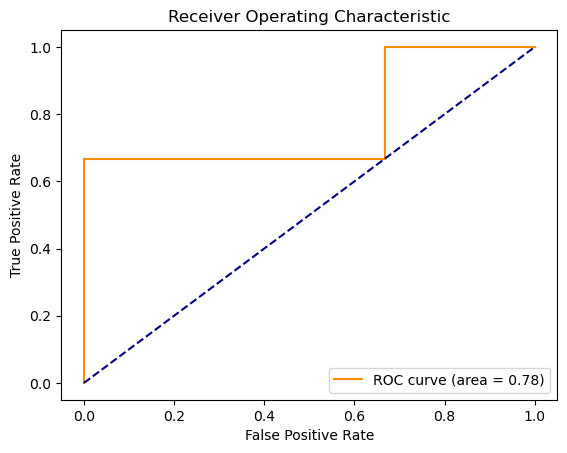

In [1158]:
# Get predicted probabilities for the positive class (Class 1)
y_prob = xg_clf.predict_proba(X_test)[:, 1]
# Compute ROC-AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"ROC-AUC: {roc_auc:.2f}")

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()


## Check feature importance

In [1159]:
print(data.shape)  # Should print (n_samples, n_features)


(47661, 94)


[ 0 29 30 31 32 34 35 36 37 38 39 40 41 42 44 47 49 50 51 52 53 54 25 24
 28 22  2  3  5  7  8 10 23 12 13 14 11 16 15 20 19 56 18 26  6 48 46  4
  9 43 21 55 27 17 45 33  1]
11


Text(0.5, 1.0, 'Feature importances')

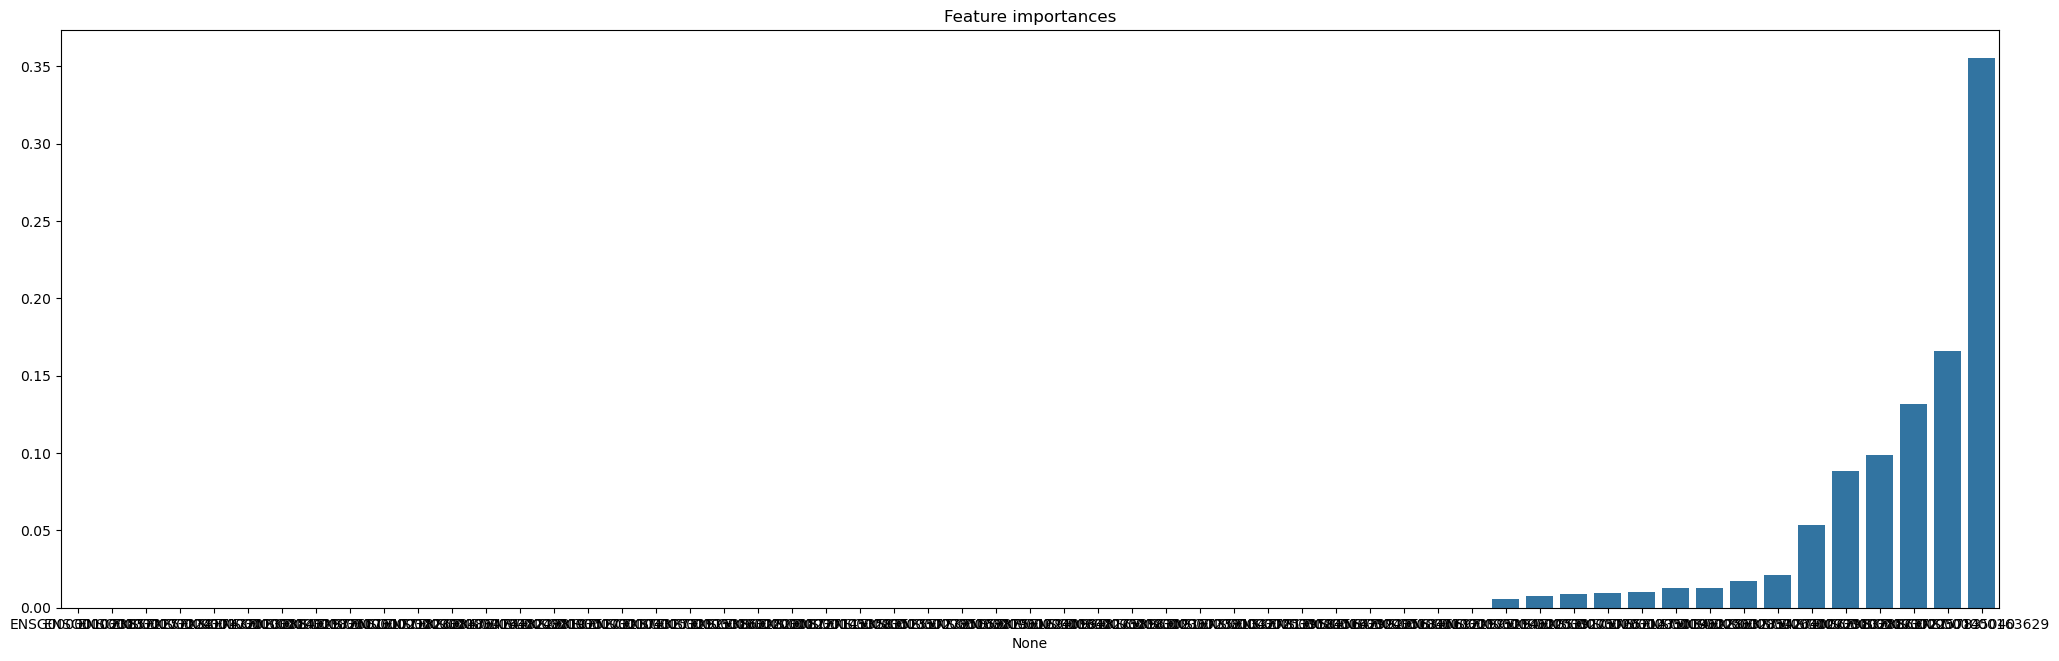

In [1160]:
import matplotlib.pyplot as plt
import seaborn as sns
print(xg_clf.feature_importances_.argsort())
important_features = xg_clf.feature_importances_ >0.01
print(important_features.sum())
sort_idx = xg_clf.feature_importances_.argsort()
fig, ax = plt.subplots(figsize=(25,7.5))
g = sns.barplot(x=X1.columns[sort_idx], y=xg_clf.feature_importances_[sort_idx], ax=ax)
g.set_title("Feature importances")

## try again with important features only

In [1161]:
X_new = X[selected_features]
# Assuming `data` is a pandas DataFrame
features_new = X1.columns[sort_idx]
features_new=features_new[0:important_features.sum()]
features_new


Index(['ENSG00000102385', 'ENSG00000137225', 'ENSG00000177238',
       'ENSG00000241743', 'ENSG00000172023', 'ENSG00000100884',
       'ENSG00000140297', 'ENSG00000182601', 'ENSG00000176177',
       'ENSG00000021826', 'ENSG00000230847'],
      dtype='object')

In [1162]:
X_new = X[features_new]
X_new['Outcome'] = Y
X_new[0:5]

C:\Users\User\AppData\Local\Temp\ipykernel_44256\1135430082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new['Outcome'] = Y


ENSG00000102385  ENSG00000137225  \
TCGA.AA.3678.01A.01R.0905.07         9.621087        29.825370   
TCGA.AA.3842.01A.01R.1022.07        12.361236        18.541853   
TCGA.AA.3955.01A.02R.1022.07         0.000000         7.457566   
TCGA.AA.3976.01A.01R.1022.07         8.305428         5.536952   
TCGA.AA.A01C.01A.01R.A00A.07        22.983900         5.745975   

                              ENSG00000177238  ENSG00000241743  \
TCGA.AA.3678.01A.01R.0905.07         5.772652       132.771004   
TCGA.AA.3842.01A.01R.1022.07        20.602059         2.060206   
TCGA.AA.3955.01A.02R.1022.07        46.609785        20.508305   
TCGA.AA.3976.01A.01R.1022.07        30.453235        30.453235   
TCGA.AA.A01C.01A.01R.A00A.07         5.745975        48.840788   

                              ENSG00000172023  ENSG00000100884  \
TCGA.AA.3678.01A.01R.0905.07       304.026356         2.886326   
TCGA.AA.3842.01A.01R.1022.07        41.204118         0.000000   
TCGA.AA.3955.01A.02R.1022.07         9.321957         9.321957   
TCGA.AA.3976.01A.01R.1022.07        60.906471        49.832567   
TCGA.AA.A01C.01A.01R.A00A.07       149.395351        77.570663   

                              ENSG00000140297  ENSG00000182601  \
TCGA.AA.3678.01A.01R.0905.07      4101.469480         0.000000   
TCGA.AA.3842.01A.01R.1022.07      5698.529573         0.000000   
TCGA.AA.3955.01A.02R.1022.07      3954.374153       941.517656   
TCGA.AA.3976.01A.01R.1022.07      4930.655669         0.000000   
TCGA.AA.A01C.01A.01R.A00A.07       465.423978         0.000000   

                              ENSG00000176177  ENSG00000021826  \
TCGA.AA.3678.01A.01R.0905.07         0.962109         1.924217   
TCGA.AA.3842.01A.01R.1022.07         6.180618      1225.822522   
TCGA.AA.3955.01A.02R.1022.07        26.101480         0.000000   
TCGA.AA.3976.01A.01R.1022.07        11.073904        22.147808   
TCGA.AA.A01C.01A.01R.A00A.07         0.000000       178.125226   

                              ENSG00000230847  Outcome  
TCGA.AA.3678.01A.01R.0905.07         0.962109        1  
TCGA.AA.3842.01A.01R.1022.07         0.000000        1  
TCGA.AA.3955.01A.02R.1022.07         0.000000        1  
TCGA.AA.3976.01A.01R.1022.07         0.000000        1  
TCGA.AA.A01C.01A.01R.A00A.07         0.000000        1

In [1163]:
train, test = train_test_split(X_new, test_size = 0.25, random_state = 42, stratify = X_new['Outcome'])
X_train, y_train, X_test, y_test = train.drop(['Outcome'], axis = 1), train['Outcome'], \
                                   test.drop(['Outcome'], axis = 1), test['Outcome']

In [1164]:
X_train

ENSG00000102385  ENSG00000137225  \
TCGA.AA.3955.01A.02R.1022.07         0.000000         7.457566   
TCGA.AU.6004.01A.11R.1723.07        19.535310        13.395641   
TCGA.AA.3821.01A.01R.1022.07        64.836688        13.231977   
TCGA.G4.6306.01A.11R.1774.07         5.386424        35.550396   
TCGA.AD.6890.01A.11R.1928.07        66.079403        11.563896   
...                                       ...              ...   
TCGA.AA.3538.01A.01R.0821.07         6.666467        11.110779   
TCGA.A6.5659.01B.04R.A277.07        40.012530         4.763396   
TCGA.CM.5341.01A.01R.1410.07         8.834145        33.864224   
TCGA.AZ.4313.01A.01R.1410.07       108.301160         7.924475   
TCGA.AY.A71X.01A.12R.A37K.07       191.447025         2.968171   

                              ENSG00000177238  ENSG00000241743  \
TCGA.AA.3955.01A.02R.1022.07        46.609785        20.508305   
TCGA.AU.6004.01A.11R.1723.07         7.255972         2.232607   
TCGA.AA.3821.01A.01R.1022.07      1827.336052         7.939186   
TCGA.G4.6306.01A.11R.1774.07        10.772847        28.009403   
TCGA.AD.6890.01A.11R.1928.07         8.259925        21.475806   
...                                       ...              ...   
TCGA.AA.3538.01A.01R.0821.07         1.111078        33.332337   
TCGA.A6.5659.01B.04R.A277.07        22.864303     54219.836539   
TCGA.CM.5341.01A.01R.1410.07         2.944715        16.195933   
TCGA.AZ.4313.01A.01R.1410.07       211.319336        18.490442   
TCGA.AY.A71X.01A.12R.A37K.07         7.915122       130.599521   

                              ENSG00000172023  ENSG00000100884  \
TCGA.AA.3955.01A.02R.1022.07         9.321957         9.321957   
TCGA.AU.6004.01A.11R.1723.07        19.535310         1.116303   
TCGA.AA.3821.01A.01R.1022.07        75.422270        25.140757   
TCGA.G4.6306.01A.11R.1774.07       108.805758         4.309139   
TCGA.AD.6890.01A.11R.1928.07       127.202851         2.477978   
...                                       ...              ...   
TCGA.AA.3538.01A.01R.0821.07       195.549710        14.444013   
TCGA.A6.5659.01B.04R.A277.07        11.432152       293.425222   
TCGA.CM.5341.01A.01R.1410.07         0.000000         0.000000   
TCGA.AZ.4313.01A.01R.1410.07     14013.113447        79.244751   
TCGA.AY.A71X.01A.12R.A37K.07        40.565003         7.420427   

                              ENSG00000140297  ENSG00000182601  \
TCGA.AA.3955.01A.02R.1022.07      3954.374153       941.517656   
TCGA.AU.6004.01A.11R.1723.07      4143.718262         0.000000   
TCGA.AA.3821.01A.01R.1022.07      1315.258534         1.323198   
TCGA.G4.6306.01A.11R.1774.07      7857.714845        48.477813   
TCGA.AD.6890.01A.11R.1928.07      1951.820371         4.955955   
...                                       ...              ...   
TCGA.AA.3538.01A.01R.0821.07      3082.130085         4.444312   
TCGA.A6.5659.01B.04R.A277.07       128.611704         4.763396   
TCGA.CM.5341.01A.01R.1410.07       686.118631         0.000000   
TCGA.AZ.4313.01A.01R.1410.07      3560.730806         0.000000   
TCGA.AY.A71X.01A.12R.A37K.07      2795.027629         0.000000   

                              ENSG00000176177  ENSG00000021826  \
TCGA.AA.3955.01A.02R.1022.07        26.101480         0.000000   
TCGA.AU.6004.01A.11R.1723.07         1.674455        12.279338   
TCGA.AA.3821.01A.01R.1022.07         2.646395        11.908779   
TCGA.G4.6306.01A.11R.1774.07         5.386424      3025.015531   
TCGA.AD.6890.01A.11R.1928.07         1.651985        19.823821   
...                                       ...              ...   
TCGA.AA.3538.01A.01R.0821.07         5.555389        21.110480   
TCGA.A6.5659.01B.04R.A277.07         0.000000       116.226874   
TCGA.CM.5341.01A.01R.1410.07       147.235758        10.306503   
TCGA.AZ.4313.01A.01R.1410.07         0.000000       100.376684   
TCGA.AY.A71X.01A.12R.A37K.07         0.494695      1623.094805   

                              ENSG00000230847  
TCGA.AA.3955.01A.

In [1165]:
X_test

ENSG00000102385  ENSG00000137225  \
TCGA.F4.6808.01A.11R.1839.07         5.166005         9.471010   
TCGA.AA.3556.01A.01R.0821.07       101.025702         2.434354   
TCGA.D5.6540.01A.11R.1723.07        10.364488        13.603391   
TCGA.D5.7000.01A.11R.A32Z.07        19.283552        10.423542   
TCGA.A6.2684.01A.01R.A278.07        52.471158         4.770105   
TCGA.AA.3549.01A.02R.0821.07        11.007903        20.639818   
TCGA.F4.6856.01A.11R.1928.07       153.788138         9.415600   
TCGA.A6.6653.01A.11R.1774.07         4.706742        10.982398   
TCGA.AA.3544.01A.01R.1873.07         1.744046        24.416643   
TCGA.AA.3506.01A.01R.1410.07        58.745413        49.469821   
TCGA.CK.5916.01A.11R.1653.07        34.282314         6.094634   
TCGA.CK.6751.01A.11R.1839.07        14.613558        13.152202   
TCGA.CM.4750.01A.01R.1410.07         7.370467        16.215027   
TCGA.AA.3986.01A.02R.1022.07        38.827204        14.118983   
TCGA.CM.5864.01A.01R.1653.07         5.514634         3.676423   
TCGA.G4.6321.01A.11R.1723.07        13.782602       457.122950   
TCGA.AA.3877.01A.01R.1022.07         8.540927        26.842913   
TCGA.AA.3858.01A.01R.0905.07        17.880875         6.877259   
TCGA.A6.2684.01A.01R.1410.07        56.285113        10.648535   
TCGA.AY.4071.01A.01R.1113.07        13.379613        72.249908   
TCGA.CK.5912.01A.11R.1653.07         5.080675        10.887160   
TCGA.G4.6628.01A.11R.1839.07         5.637305        10.710880   
TCGA.AA.3678.01A.01R.0905.07         9.621087        29.825370   
TCGA.AY.A54L.01A.11R.A28H.07        24.929731        10.525886   

                              ENSG00000177238  ENSG00000241743  \
TCGA.F4.6808.01A.11R.1839.07         3.444004        66.297070   
TCGA.AA.3556.01A.01R.0821.07        10.954594        12.171771   
TCGA.D5.6540.01A.11R.1723.07         3.886683         0.647781   
TCGA.D5.7000.01A.11R.A32Z.07         4.169417        25.537677   
TCGA.A6.2684.01A.01R.A278.07       550.606441     32427.175846   
TCGA.AA.3549.01A.02R.0821.07        16.511854        20.639818   
TCGA.F4.6856.01A.11R.1928.07       414.286411        24.062090   
TCGA.A6.6653.01A.11R.1774.07         2.353371         0.000000   
TCGA.AA.3544.01A.01R.1873.07         5.232138        24.416643   
TCGA.AA.3506.01A.01R.1410.07         9.275592        12.367455   
TCGA.CK.5916.01A.11R.1653.07         0.000000        81.515725   
TCGA.CK.6751.01A.11R.1839.07       946.227854         6.576101   
TCGA.CM.4750.01A.01R.1410.07         4.422280        47.170987   
TCGA.AA.3986.01A.02R.1022.07         2.353164        38.827204   
TCGA.CM.5864.01A.01R.1653.07         0.919106        11.948374   
TCGA.G4.6321.01A.11R.1723.07        36.753604        48.239105   
TCGA.AA.3877.01A.01R.1022.07        17.081853         1.220132   
TCGA.AA.3858.01A.01R.0905.07       448.397316       298.473060   
TCGA.A6.2684.01A.01R.1410.07       635.869661       524.820653   
TCGA.AY.4071.01A.01R.1113.07         4.013884       284.985748   
TCGA.CK.5912.01A.11R.1653.07         4.354864       105.242547   
TCGA.G4.6628.01A.11R.1839.07         2.818653         4.509844   
TCGA.AA.3678.01A.01R.0905.07         5.772652       132.771004   
TCGA.AY.A54L.01A.11R.A28H.07       389.457794       169.522169   

                              ENSG00000172023  ENSG00000100884  \
TCGA.F4.6808.01A.11R.1839.07      2852.496007        44.772047   
TCGA.AA.3556.01A.01R.0821.07       423.577644         0.000000   
TCGA.D5.6540.01A.11R.1723.07         6.477805         0.647781   
TCGA.D5.7000.01A.11R.A32Z.07        15.635313         1.563531   
TCGA.A6.2684.01A.01R.A278.07        36.116512        42.930948   
TCGA.AA.3549.01A.02R.0821.07     50989.982243        66.047417   
TCGA.F4.6856.01A.11R.1928.07      1460.464218         3.138533   
TCGA.A6.6653.01A.11R.1774.07       509.112589         0.000000   
TCGA.AA.3544.01A.01R.1873.07      6611.678011         1.744046   
TCGA.AA.3506.01A.01R.1410.07       627.648359         3.091864   
TC

In [1166]:
X_test = X_test[features_new]
X_train = X_train[features_new]

In [1167]:
# Types for Oversampling
report_labels = ["No Oversampling",
                 "Random Oversampling", 
                 "SMOTE", 
                 "Borderline SMOTE", 
                 "SVM SMOTE"]

comparison_sets = [(X_train, y_train), 
                   (X_random, y_random), 
                   (X_smote, y_smote), 
                   (X_smoteborder, y_smoteborder), 
                   (X_smotesvm, y_smotesvm)]
# Train the model on the resampled data
xg_clf = xgb.XGBClassifier(objective='binary:logistic')
for i in range(len(comparison_sets)):
    if i < len(report_labels):
        print(f"{report_labels[i]}:")
    # Extract and convert train data
    X_train = comparison_sets[i][0]
    y_train = comparison_sets[i][1]
    X_test = X_test[features_new]
    X_train = X_train[features_new]
    # Train the model
    xg_clf.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = xg_clf.predict(X_test)
    print(classification_report(y_test, y_pred))


No Oversampling:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.50      0.33      0.40         3

    accuracy                           0.88        24
   macro avg       0.70      0.64      0.67        24
weighted avg       0.86      0.88      0.86        24

Random Oversampling:
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        21
           1       0.50      0.67      0.57         3

    accuracy                           0.88        24
   macro avg       0.72      0.79      0.75        24
weighted avg       0.89      0.88      0.88        24

SMOTE:
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        21
           1       0.50      0.67      0.57         3

    accuracy                           0.88        24
   macro avg       0.72      0.79      0.75        24
weighted avg       0.89      

# TEST 2: add methylation features

In [1168]:
DMP_propagation=pd.read_csv("../result/propagate_scores_mapped.csv", index_col=0)
biomarkers = DMP_propagation['ensembl_gene_id']
biomarkers.head()

1    ENSG00000099326
2    ENSG00000105321
3    ENSG00000257365
4    ENSG00000130300
5    ENSG00000130303
Name: ensembl_gene_id, dtype: object

In [1169]:
DMP= pd.read_csv("../data/DMPs_1.csv")
DMP_markers = DMP["ensembl_gene_id"].dropna().drop_duplicates().tolist()
DMP_markers

['ENSG00000105321',
 'ENSG00000183648',
 'ENSG00000153989',
 'ENSG00000130300',
 'ENSG00000018869']

In [1170]:
X2= X.loc[:, X.columns.isin(biomarkers)]
threshold = len(X2) / 2  # More than half of the rows
X2 = X2.loc[:, (X2 == 0.0).sum(axis=0) <= threshold]
X2 = np.log(X2)

c:\Users\User\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [1171]:
X2 = pd.concat([X1, X2], axis=1)
X2

ENSG00000102385  ENSG00000163629  \
TCGA.AA.3678.01A.01R.0905.07         9.621087       607.090603   
TCGA.AA.3842.01A.01R.1022.07        12.361236       121.552149   
TCGA.AA.3955.01A.02R.1022.07         0.000000       160.337660   
TCGA.AA.3976.01A.01R.1022.07         8.305428       182.719413   
TCGA.AA.A01C.01A.01R.A00A.07        22.983900       117.792488   
...                                       ...              ...   
TCGA.F4.6856.01A.11R.1928.07       153.788138       818.111045   
TCGA.G4.6306.01A.11R.1774.07         5.386424        26.932118   
TCGA.G4.6628.01A.11R.1839.07         5.637305        88.505693   
TCGA.QG.A5Z2.01A.11R.A28H.07        56.122280      1520.828744   
TCGA.QL.A97D.01A.12R.A41B.07         8.671253      1665.547686   

                              ENSG00000168875  ENSG00000196169  \
TCGA.AA.3678.01A.01R.0905.07         3.848435        16.355848   
TCGA.AA.3842.01A.01R.1022.07         2.060206        39.143912   
TCGA.AA.3955.01A.02R.1022.07         0.000000        14.915131   
TCGA.AA.3976.01A.01R.1022.07         8.305428         0.000000   
TCGA.AA.A01C.01A.01R.A00A.07         0.000000         5.745975   
...                                       ...              ...   
TCGA.F4.6856.01A.11R.1928.07         3.138533       413.240234   
TCGA.G4.6306.01A.11R.1774.07         4.309139         9.695563   
TCGA.G4.6628.01A.11R.1839.07         0.000000        28.186526   
TCGA.QG.A5Z2.01A.11R.A28H.07         2.976181       140.305699   
TCGA.QL.A97D.01A.12R.A41B.07        14.007409        14.007409   

                              ENSG00000196228  ENSG00000224099  \
TCGA.AA.3678.01A.01R.0905.07         0.000000        41.370675   
TCGA.AA.3842.01A.01R.1022.07         0.000000         2.060206   
TCGA.AA.3955.01A.02R.1022.07         0.000000         7.457566   
TCGA.AA.3976.01A.01R.1022.07         2.768476        19.379332   
TCGA.AA.A01C.01A.01R.A00A.07         0.000000        25.856888   
...                                       ...              ...   
TCGA.F4.6856.01A.11R.1928.07         1.046178        30.339156   
TCGA.G4.6306.01A.11R.1774.07         2.154569         0.000000   
TCGA.G4.6628.01A.11R.1839.07         1.127461         0.000000   
TCGA.QG.A5Z2.01A.11R.A28H.07        40.816203         2.551013   
TCGA.QL.A97D.01A.12R.A41B.07        10.672312        36.019053   

                              ENSG00000275765  ENSG00000164816  \
TCGA.AA.3678.01A.01R.0905.07        31.749588       437.759468   
TCGA.AA.3842.01A.01R.1022.07        49.444942         2.060206   
TCGA.AA.3955.01A.02R.1022.07        93.219570        11.186348   
TCGA.AA.3976.01A.01R.1022.07        22.147808        19.379332   
TCGA.AA.A01C.01A.01R.A00A.07        89.062613       229.839001   
...                                       ...              ...   
TCGA.F4.6856.01A.11R.1928.07        39.754757         0.000000   
TCGA.G4.6306.01A.11R.1774.07        31.241257        90.491918   
TCGA.G4.6628.01A.11R.1839.07        15.784455         7.328497   
TCGA.QG.A5Z2.01A.11R.A28H.07        27.210802       387.328763   
TCGA.QL.A97D.01A.12R.A41B.07        35.352033         4.669136   

                              ENSG00000275896  ENSG00000256377  ...  \
TCGA.AA.3678.01A.01R.0905.07       181.838548         0.000000  ...   
TCGA.AA.3842.01A.01R.1022.07        30.903089         0.000000  ...   
TCGA.AA.3955.01A.02R.1022.07         3.728783         0.000000  ...   
TCGA.AA.3976.01A.01R.1022.07       191.024841         0.000000  ...   
TCGA.AA.A01C.01A.01R.A00A.07         2.872988         0.000000  ...   
...                                       ...              ...  ...   
TCGA.F4.6856.01A.11R.1928.07         1.046178         9.415600  ...   
TCGA.G4.6306.01A.11R.1774.07       104.496619         0.000000  ...   
TCGA.G4.6628.01A.11R.1839.07        37.206215         1.127461  ...   
TCGA.QG.A5Z2.01A.11R.A28H.07         4.676857        64.625655  ...   
TCGA.QL.A97D.01A.12R.A41B.07         2.001058         3.335097  ...   

     

In [1172]:
duplicated_columns = X2.columns[X2.columns.duplicated()].unique()
X2 = X2.loc[:, ~X2.columns.duplicated()]
duplicated_columns


Index([], dtype='object')

In [1173]:
X2 = X2.apply(lambda x: x.fillna(x.mean()) if x.dtype in [np.float64, np.int64] else x)
X2 = X2.loc[:, ~X2.isin([np.inf, -np.inf]).any()]


In [1174]:
X2['Outcome']=Y
X2

ENSG00000102385  ENSG00000163629  \
TCGA.AA.3678.01A.01R.0905.07         9.621087       607.090603   
TCGA.AA.3842.01A.01R.1022.07        12.361236       121.552149   
TCGA.AA.3955.01A.02R.1022.07         0.000000       160.337660   
TCGA.AA.3976.01A.01R.1022.07         8.305428       182.719413   
TCGA.AA.A01C.01A.01R.A00A.07        22.983900       117.792488   
...                                       ...              ...   
TCGA.F4.6856.01A.11R.1928.07       153.788138       818.111045   
TCGA.G4.6306.01A.11R.1774.07         5.386424        26.932118   
TCGA.G4.6628.01A.11R.1839.07         5.637305        88.505693   
TCGA.QG.A5Z2.01A.11R.A28H.07        56.122280      1520.828744   
TCGA.QL.A97D.01A.12R.A41B.07         8.671253      1665.547686   

                              ENSG00000168875  ENSG00000196169  \
TCGA.AA.3678.01A.01R.0905.07         3.848435        16.355848   
TCGA.AA.3842.01A.01R.1022.07         2.060206        39.143912   
TCGA.AA.3955.01A.02R.1022.07         0.000000        14.915131   
TCGA.AA.3976.01A.01R.1022.07         8.305428         0.000000   
TCGA.AA.A01C.01A.01R.A00A.07         0.000000         5.745975   
...                                       ...              ...   
TCGA.F4.6856.01A.11R.1928.07         3.138533       413.240234   
TCGA.G4.6306.01A.11R.1774.07         4.309139         9.695563   
TCGA.G4.6628.01A.11R.1839.07         0.000000        28.186526   
TCGA.QG.A5Z2.01A.11R.A28H.07         2.976181       140.305699   
TCGA.QL.A97D.01A.12R.A41B.07        14.007409        14.007409   

                              ENSG00000196228  ENSG00000224099  \
TCGA.AA.3678.01A.01R.0905.07         0.000000        41.370675   
TCGA.AA.3842.01A.01R.1022.07         0.000000         2.060206   
TCGA.AA.3955.01A.02R.1022.07         0.000000         7.457566   
TCGA.AA.3976.01A.01R.1022.07         2.768476        19.379332   
TCGA.AA.A01C.01A.01R.A00A.07         0.000000        25.856888   
...                                       ...              ...   
TCGA.F4.6856.01A.11R.1928.07         1.046178        30.339156   
TCGA.G4.6306.01A.11R.1774.07         2.154569         0.000000   
TCGA.G4.6628.01A.11R.1839.07         1.127461         0.000000   
TCGA.QG.A5Z2.01A.11R.A28H.07        40.816203         2.551013   
TCGA.QL.A97D.01A.12R.A41B.07        10.672312        36.019053   

                              ENSG00000275765  ENSG00000164816  \
TCGA.AA.3678.01A.01R.0905.07        31.749588       437.759468   
TCGA.AA.3842.01A.01R.1022.07        49.444942         2.060206   
TCGA.AA.3955.01A.02R.1022.07        93.219570        11.186348   
TCGA.AA.3976.01A.01R.1022.07        22.147808        19.379332   
TCGA.AA.A01C.01A.01R.A00A.07        89.062613       229.839001   
...                                       ...              ...   
TCGA.F4.6856.01A.11R.1928.07        39.754757         0.000000   
TCGA.G4.6306.01A.11R.1774.07        31.241257        90.491918   
TCGA.G4.6628.01A.11R.1839.07        15.784455         7.328497   
TCGA.QG.A5Z2.01A.11R.A28H.07        27.210802       387.328763   
TCGA.QL.A97D.01A.12R.A41B.07        35.352033         4.669136   

                              ENSG00000275896  ENSG00000256377  ...  \
TCGA.AA.3678.01A.01R.0905.07       181.838548         0.000000  ...   
TCGA.AA.3842.01A.01R.1022.07        30.903089         0.000000  ...   
TCGA.AA.3955.01A.02R.1022.07         3.728783         0.000000  ...   
TCGA.AA.3976.01A.01R.1022.07       191.024841         0.000000  ...   
TCGA.AA.A01C.01A.01R.A00A.07         2.872988         0.000000  ...   
...                                       ...              ...  ...   
TCGA.F4.6856.01A.11R.1928.07         1.046178         9.415600  ...   
TCGA.G4.6306.01A.11R.1774.07       104.496619         0.000000  ...   
TCGA.G4.6628.01A.11R.1839.07        37.206215         1.127461  ...   
TCGA.QG.A5Z2.01A.11R.A28H.07         4.676857        64.625655  ...   
TCGA.QL.A97D.01A.12R.A41B.07         2.001058         3.335097  ...   

     

In [1175]:
train, test = train_test_split(X2, test_size = 0.25, random_state = 42, stratify = X2['Outcome'])
X_train, y_train, X_test, y_test = train.drop(['Outcome'], axis = 1), train['Outcome'], \
                                   test.drop(['Outcome'], axis = 1), test['Outcome']
print(y_train.shape, y_train.value_counts())
print(y_test.shape, y_test.value_counts())


(70,) Outcome
0    62
1     8
Name: count, dtype: int64
(24,) Outcome
0    21
1     3
Name: count, dtype: int64


In [1176]:
## Randon oversampling
random_os = RandomOverSampler(random_state = 42)
X_random, y_random = random_os.fit_resample(X_train, y_train)
print("Randon Oversampling...")
print(y_random.value_counts())
print(X_random.shape, y_random.shape)

# SMOTE 
smote_os = SMOTE(random_state = 42)
X_smote, y_smote = smote_os.fit_resample(X_train, y_train)
print("SMOTE...")
print(y_smote.value_counts())
print(X_smote.shape)

# Borderline SMOTE
smote_border = BorderlineSMOTE(random_state = 42, kind = 'borderline-2')
X_smoteborder, y_smoteborder = smote_border.fit_resample(X_train, y_train)
print("Borderline SMOTE...")
print(y_smoteborder.value_counts())
print(X_smoteborder.shape)

# SVM SMOTE
smote_svm = SVMSMOTE(random_state = 42)
X_smotesvm, y_smotesvm = smote_svm.fit_resample(X_train, y_train)
print("SVM SMOTE...")
print(y_smotesvm.value_counts())
print(X_smotesvm.shape)

# Types for Oversampling
report_labels = ["No Oversampling",
                 "Random Oversampling", 
                 "SMOTE", 
                 "Borderline SMOTE", 
                 "SVM SMOTE"]

comparison_sets = [(X_train, y_train), 
                   (X_random, y_random), 
                   (X_smote, y_smote), 
                   (X_smoteborder, y_smoteborder), 
                   (X_smotesvm, y_smotesvm)]



Randon Oversampling...
Outcome
1    62
0    62
Name: count, dtype: int64
(124, 92) (124,)
SMOTE...
Outcome
1    62
0    62
Name: count, dtype: int64
(124, 92)
Borderline SMOTE...
Outcome
1    62
0    62
Name: count, dtype: int64
(124, 92)
SVM SMOTE...
Outcome
0    62
1    38
Name: count, dtype: int64
(100, 92)


In [1177]:
rf = RandomForestClassifier(random_state = 42, max_depth = 5)
for i in range(0, len(comparison_sets)):
    if i < len(report_labels):
        print(f"{report_labels[i]}:")

    rf.fit(comparison_sets[i][0], comparison_sets[i][1])
    print(classification_report(y_test, rf.predict(X_test)))

No Oversampling:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        21
           1       0.00      0.00      0.00         3

    accuracy                           0.88        24
   macro avg       0.44      0.50      0.47        24
weighted avg       0.77      0.88      0.82        24

Random Oversampling:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        21
           1       1.00      0.33      0.50         3

    accuracy                           0.92        24
   macro avg       0.96      0.67      0.73        24
weighted avg       0.92      0.92      0.90        24

SMOTE:


c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.91      1.00      0.95        21
           1       1.00      0.33      0.50         3

    accuracy                           0.92        24
   macro avg       0.96      0.67      0.73        24
weighted avg       0.92      0.92      0.90        24

Borderline SMOTE:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        21
           1       1.00      0.33      0.50         3

    accuracy                           0.92        24
   macro avg       0.96      0.67      0.73        24
weighted avg       0.92      0.92      0.90        24

SVM SMOTE:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        21
           1       1.00      0.33      0.50         3

    accuracy                           0.92        24
   macro avg       0.96      0.67      0.73        24
weighted avg       0.92      0.92      0.90  

In [1178]:
xg_clf = xgb.XGBClassifier(objective='binary:logistic')
for i in range(len(comparison_sets)):
    if i < len(report_labels):
        print(f"{report_labels[i]}:")

    X_train = comparison_sets[i][0]
    y_train = comparison_sets[i][1]
    X_train = X_train.apply(pd.to_numeric, errors='coerce')
    X_train = X_train.values
    y_train = y_train.values

    xg_clf.fit(X_train, y_train)
    y_pred = xg_clf.predict(X_test)
    print(classification_report(y_test, y_pred))

No Oversampling:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.67      0.80         3

    accuracy                           0.96        24
   macro avg       0.98      0.83      0.89        24
weighted avg       0.96      0.96      0.95        24

Random Oversampling:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.67      0.80         3

    accuracy                           0.96        24
   macro avg       0.98      0.83      0.89        24
weighted avg       0.96      0.96      0.95        24

SMOTE:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.67      0.80         3

    accuracy                           0.96        24
   macro avg       0.98      0.83      0.89        24
weighted avg       0.96      

In [1179]:
xg_clf.fit(X_smote, y_smote)
y_pred = xg_clf.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[21  0]
 [ 1  2]]


ROC-AUC: 0.81


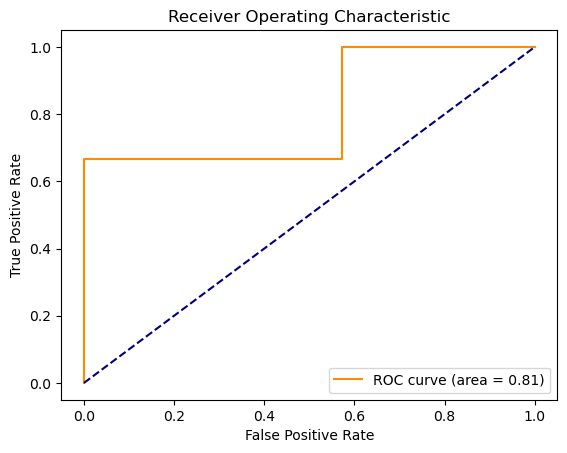

In [1180]:
# Get predicted probabilities for the positive class (Class 1)
y_prob = xg_clf.predict_proba(X_test)[:, 1]
# Compute ROC-AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"ROC-AUC: {roc_auc:.2f}")

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()


# TEST 3: add high propagation score genes as features

In [1181]:
biomarkers = pd.read_csv("../result/propagate_scores_WGCNA.csv")
biomarkers[0:5]

ENSP     Score
0  ENSG00000072315.3  0.000721
1  ENSG00000115474.7  0.000671
2  ENSG00000146006.8  0.000953
3  ENSG00000147896.3  0.000956
4  ENSG00000149651.4  0.000941

In [1182]:
features2 = list(set(biomarkers['ENSP'].tolist()))      # List of CpG site names
print(len(features2),f"Number of unique genes:",features2)

165 Number of unique genes: ['ENSG00000279530.2', 'ENSG00000261528.2', 'ENSG00000238133.6', 'ENSG00000204113.6', 'ENSG00000227523.1', 'ENSG00000172209.6', 'ENSG00000287195.1', 'ENSG00000225767.1', 'ENSG00000287524.1', 'ENSG00000230292.5', 'ENSG00000280326.1', 'ENSG00000241743.4', 'ENSG00000237853.6', 'ENSG00000279544.1', 'ENSG00000266987.1', 'ENSG00000263477.1', 'ENSG00000270116.1', 'ENSG00000212128.2', 'ENSG00000282917.2', 'ENSG00000288076.1', 'ENSG00000279819.1', 'ENSG00000229502.5', 'ENSG00000267055.1', 'ENSG00000256188.3', 'ENSG00000147896.3', 'ENSG00000279509.1', 'ENSG00000280069.1', 'ENSG00000187229.3', 'ENSG00000285994.1', 'ENSG00000286145.2', 'ENSG00000270421.1', 'ENSG00000286316.1', 'ENSG00000258044.1', 'ENSG00000271204.1', 'ENSG00000286742.1', 'ENSG00000231132.1', 'ENSG00000222007.6', 'ENSG00000286071.1', 'ENSG00000267529.3', 'ENSG00000200087.1', 'ENSG00000287141.1', 'ENSG00000218757.1', 'ENSG00000232162.1', 'ENSG00000241560.7', 'ENSG00000197550.3', 'ENSG00000226647.2', 'ENSG

In [1183]:
# Remove decimals from features2
features2 = [str(gene).split('.')[0] for gene in features2]  # Keep only the part before the decimal

filtered_features = [gene for gene in features2 if gene in X.columns]
len(filtered_features)

165

In [1184]:
X3 = X[filtered_features]
threshold = len(X3) / 2  # More than half of the rows
X3 = X3.loc[:, (X3== 0.0).sum(axis=0) <= threshold]
X3

ENSG00000279530  ENSG00000238133  \
TCGA.AA.3678.01A.01R.0905.07         3.848435         6.734761   
TCGA.AA.3842.01A.01R.1022.07         0.000000         2.060206   
TCGA.AA.3955.01A.02R.1022.07         0.000000         3.728783   
TCGA.AA.3976.01A.01R.1022.07         0.000000         8.305428   
TCGA.AA.A01C.01A.01R.A00A.07         0.000000         8.618963   
...                                       ...              ...   
TCGA.F4.6856.01A.11R.1928.07         0.000000         7.323245   
TCGA.G4.6306.01A.11R.1774.07         1.077285       238.079926   
TCGA.G4.6628.01A.11R.1839.07         2.254922         8.455958   
TCGA.QG.A5Z2.01A.11R.A28H.07         5.102025        14.030570   
TCGA.QL.A97D.01A.12R.A41B.07        11.339331        36.019053   

                              ENSG00000172209  ENSG00000287195  \
TCGA.AA.3678.01A.01R.0905.07         2.886326         0.962109   
TCGA.AA.3842.01A.01R.1022.07         2.060206         0.000000   
TCGA.AA.3955.01A.02R.1022.07         3.728783         0.000000   
TCGA.AA.3976.01A.01R.1022.07         0.000000         0.000000   
TCGA.AA.A01C.01A.01R.A00A.07         0.000000         0.000000   
...                                       ...              ...   
TCGA.F4.6856.01A.11R.1928.07         3.138533         0.000000   
TCGA.G4.6306.01A.11R.1774.07         2.154569         1.077285   
TCGA.G4.6628.01A.11R.1839.07         1.127461         1.127461   
TCGA.QG.A5Z2.01A.11R.A28H.07         0.425169         0.850338   
TCGA.QL.A97D.01A.12R.A41B.07         2.001058         2.001058   

                              ENSG00000241743  ENSG00000279544  \
TCGA.AA.3678.01A.01R.0905.07       132.771004         0.000000   
TCGA.AA.3842.01A.01R.1022.07         2.060206         2.060206   
TCGA.AA.3955.01A.02R.1022.07        20.508305         0.000000   
TCGA.AA.3976.01A.01R.1022.07        30.453235         0.000000   
TCGA.AA.A01C.01A.01R.A00A.07        48.840788         0.000000   
...                                       ...              ...   
TCGA.F4.6856.01A.11R.1928.07        24.062090         0.000000   
TCGA.G4.6306.01A.11R.1774.07        28.009403         1.077285   
TCGA.G4.6628.01A.11R.1839.07         4.509844         0.000000   
TCGA.QG.A5Z2.01A.11R.A28H.07        10.629220         0.850338   
TCGA.QL.A97D.01A.12R.A41B.07       548.290027         4.002117   

                              ENSG00000270116  ENSG00000280069  \
TCGA.AA.3678.01A.01R.0905.07         4.810544         4.810544   
TCGA.AA.3842.01A.01R.1022.07         0.000000         4.120412   
TCGA.AA.3955.01A.02R.1022.07         1.864391         1.864391   
TCGA.AA.3976.01A.01R.1022.07         0.000000         0.000000   
TCGA.AA.A01C.01A.01R.A00A.07         0.000000         0.000000   
...                                       ...              ...   
TCGA.F4.6856.01A.11R.1928.07         0.000000         0.000000   
TCGA.G4.6306.01A.11R.1774.07         1.077285         1.077285   
TCGA.G4.6628.01A.11R.1839.07         3.946114         1.691192   
TCGA.QG.A5Z2.01A.11R.A28H.07         5.527194         3.401350   
TCGA.QL.A97D.01A.12R.A41B.07         4.669136        14.674429   

                              ENSG00000285994  ENSG00000286145  ...  \
TCGA.AA.3678.01A.01R.0905.07         2.886326         1.924217  ...   
TCGA.AA.3842.01A.01R.1022.07         0.000000         6.180618  ...   
TCGA.AA.3955.01A.02R.1022.07         0.000000         1.864391  ...   
TCGA.AA.3976.01A.01R.1022.07         0.000000         0.000000  ...   
TCGA.AA.A01C.01A.01R.A00A.07         0.000000         0.000000  ...   
...                                       ...              ...  ...   
TCGA.F4.6856.01A.11R.1928.07         1.046178         0.000000  ...   
TCGA.G4.6306.01A.11R.1774.07         0.000000         2.154569  ...   
TCGA.G4.6628.01A.11R.1839.07         0.000000         1.127461  ...   
TCGA.QG.A5Z2.01A.11R.A28H.07         1.275506         0.850338  ...   
TCGA.QL.A97D.01A.12R.A41B.07         0.667019         1.334039  ...   

     

In [1185]:
X3['Outcome'] = Y
X3

ENSG00000279530  ENSG00000238133  \
TCGA.AA.3678.01A.01R.0905.07         3.848435         6.734761   
TCGA.AA.3842.01A.01R.1022.07         0.000000         2.060206   
TCGA.AA.3955.01A.02R.1022.07         0.000000         3.728783   
TCGA.AA.3976.01A.01R.1022.07         0.000000         8.305428   
TCGA.AA.A01C.01A.01R.A00A.07         0.000000         8.618963   
...                                       ...              ...   
TCGA.F4.6856.01A.11R.1928.07         0.000000         7.323245   
TCGA.G4.6306.01A.11R.1774.07         1.077285       238.079926   
TCGA.G4.6628.01A.11R.1839.07         2.254922         8.455958   
TCGA.QG.A5Z2.01A.11R.A28H.07         5.102025        14.030570   
TCGA.QL.A97D.01A.12R.A41B.07        11.339331        36.019053   

                              ENSG00000172209  ENSG00000287195  \
TCGA.AA.3678.01A.01R.0905.07         2.886326         0.962109   
TCGA.AA.3842.01A.01R.1022.07         2.060206         0.000000   
TCGA.AA.3955.01A.02R.1022.07         3.728783         0.000000   
TCGA.AA.3976.01A.01R.1022.07         0.000000         0.000000   
TCGA.AA.A01C.01A.01R.A00A.07         0.000000         0.000000   
...                                       ...              ...   
TCGA.F4.6856.01A.11R.1928.07         3.138533         0.000000   
TCGA.G4.6306.01A.11R.1774.07         2.154569         1.077285   
TCGA.G4.6628.01A.11R.1839.07         1.127461         1.127461   
TCGA.QG.A5Z2.01A.11R.A28H.07         0.425169         0.850338   
TCGA.QL.A97D.01A.12R.A41B.07         2.001058         2.001058   

                              ENSG00000241743  ENSG00000279544  \
TCGA.AA.3678.01A.01R.0905.07       132.771004         0.000000   
TCGA.AA.3842.01A.01R.1022.07         2.060206         2.060206   
TCGA.AA.3955.01A.02R.1022.07        20.508305         0.000000   
TCGA.AA.3976.01A.01R.1022.07        30.453235         0.000000   
TCGA.AA.A01C.01A.01R.A00A.07        48.840788         0.000000   
...                                       ...              ...   
TCGA.F4.6856.01A.11R.1928.07        24.062090         0.000000   
TCGA.G4.6306.01A.11R.1774.07        28.009403         1.077285   
TCGA.G4.6628.01A.11R.1839.07         4.509844         0.000000   
TCGA.QG.A5Z2.01A.11R.A28H.07        10.629220         0.850338   
TCGA.QL.A97D.01A.12R.A41B.07       548.290027         4.002117   

                              ENSG00000270116  ENSG00000280069  \
TCGA.AA.3678.01A.01R.0905.07         4.810544         4.810544   
TCGA.AA.3842.01A.01R.1022.07         0.000000         4.120412   
TCGA.AA.3955.01A.02R.1022.07         1.864391         1.864391   
TCGA.AA.3976.01A.01R.1022.07         0.000000         0.000000   
TCGA.AA.A01C.01A.01R.A00A.07         0.000000         0.000000   
...                                       ...              ...   
TCGA.F4.6856.01A.11R.1928.07         0.000000         0.000000   
TCGA.G4.6306.01A.11R.1774.07         1.077285         1.077285   
TCGA.G4.6628.01A.11R.1839.07         3.946114         1.691192   
TCGA.QG.A5Z2.01A.11R.A28H.07         5.527194         3.401350   
TCGA.QL.A97D.01A.12R.A41B.07         4.669136        14.674429   

                              ENSG00000285994  ENSG00000286145  ...  \
TCGA.AA.3678.01A.01R.0905.07         2.886326         1.924217  ...   
TCGA.AA.3842.01A.01R.1022.07         0.000000         6.180618  ...   
TCGA.AA.3955.01A.02R.1022.07         0.000000         1.864391  ...   
TCGA.AA.3976.01A.01R.1022.07         0.000000         0.000000  ...   
TCGA.AA.A01C.01A.01R.A00A.07         0.000000         0.000000  ...   
...                                       ...              ...  ...   
TCGA.F4.6856.01A.11R.1928.07         1.046178         0.000000  ...   
TCGA.G4.6306.01A.11R.1774.07         0.000000         2.154569  ...   
TCGA.G4.6628.01A.11R.1839.07         0.000000         1.127461  ...   
TCGA.QG.A5Z2.01A.11R.A28H.07         1.275506         0.850338  ...   
TCGA.QL.A97D.01A.12R.A41B.07         0.667019         1.334039  ...   

     

In [1186]:
train, test = train_test_split(X3, test_size = 0.25, random_state = 42, stratify = X3['Outcome'])
X_train, y_train, X_test, y_test = train.drop(['Outcome'], axis = 1), train['Outcome'], \
                                   test.drop(['Outcome'], axis = 1), test['Outcome']
print(y_train.shape, y_train.value_counts())
print(y_test.shape, y_test.value_counts())
X_train

(70,) Outcome
0    62
1     8
Name: count, dtype: int64
(24,) Outcome
0    21
1     3
Name: count, dtype: int64


ENSG00000279530  ENSG00000238133  \
TCGA.AA.3955.01A.02R.1022.07         0.000000         3.728783   
TCGA.AU.6004.01A.11R.1723.07         3.348910        19.535310   
TCGA.AA.3821.01A.01R.1022.07         3.969593         7.939186   
TCGA.G4.6306.01A.11R.1774.07         1.077285       238.079926   
TCGA.AD.6890.01A.11R.1928.07         3.303970        18.171836   
...                                       ...              ...   
TCGA.AA.3538.01A.01R.0821.07         0.000000         7.777545   
TCGA.A6.5659.01B.04R.A277.07      1892.973753       396.314585   
TCGA.CM.5341.01A.01R.1410.07         1.472358         7.361788   
TCGA.AZ.4313.01A.01R.1410.07         0.000000         5.282983   
TCGA.AY.A71X.01A.12R.A37K.07         6.925732        19.293111   

                              ENSG00000172209  ENSG00000287195  \
TCGA.AA.3955.01A.02R.1022.07         3.728783         0.000000   
TCGA.AU.6004.01A.11R.1723.07         0.000000         3.907062   
TCGA.AA.3821.01A.01R.1022.07         1.323198         7.939186   
TCGA.G4.6306.01A.11R.1774.07         2.154569         1.077285   
TCGA.AD.6890.01A.11R.1928.07         3.303970         3.303970   
...                                       ...              ...   
TCGA.AA.3538.01A.01R.0821.07         0.000000         2.222156   
TCGA.A6.5659.01B.04R.A277.07       700.219280       365.828848   
TCGA.CM.5341.01A.01R.1410.07         0.000000         0.000000   
TCGA.AZ.4313.01A.01R.1410.07         0.000000         0.000000   
TCGA.AY.A71X.01A.12R.A37K.07         0.494695         0.989390   

                              ENSG00000241743  ENSG00000279544  \
TCGA.AA.3955.01A.02R.1022.07        20.508305         0.000000   
TCGA.AU.6004.01A.11R.1723.07         2.232607         3.348910   
TCGA.AA.3821.01A.01R.1022.07         7.939186        11.908779   
TCGA.G4.6306.01A.11R.1774.07        28.009403         1.077285   
TCGA.AD.6890.01A.11R.1928.07        21.475806         0.000000   
...                                       ...              ...   
TCGA.AA.3538.01A.01R.0821.07        33.332337         0.000000   
TCGA.A6.5659.01B.04R.A277.07     54219.836539       889.802459   
TCGA.CM.5341.01A.01R.1410.07        16.195933         0.000000   
TCGA.AZ.4313.01A.01R.1410.07        18.490442         0.000000   
TCGA.AY.A71X.01A.12R.A37K.07       130.599521         1.978781   

                              ENSG00000270116  ENSG00000280069  \
TCGA.AA.3955.01A.02R.1022.07         1.864391         1.864391   
TCGA.AU.6004.01A.11R.1723.07         7.255972         6.697820   
TCGA.AA.3821.01A.01R.1022.07         2.646395        29.110350   
TCGA.G4.6306.01A.11R.1774.07         1.077285         1.077285   
TCGA.AD.6890.01A.11R.1928.07         4.129963         6.607940   
...                                       ...              ...   
TCGA.AA.3538.01A.01R.0821.07         2.222156         2.222156   
TCGA.A6.5659.01B.04R.A277.07       723.083583       657.348711   
TCGA.CM.5341.01A.01R.1410.07         0.000000         1.472358   
TCGA.AZ.4313.01A.01R.1410.07         0.000000         0.000000   
TCGA.AY.A71X.01A.12R.A37K.07         4.452256         6.431037   

                              ENSG00000285994  ENSG00000286145  ...  \
TCGA.AA.3955.01A.02R.1022.07         0.000000         1.864391  ...   
TCGA.AU.6004.01A.11R.1723.07         0.558152         0.000000  ...   
TCGA.AA.3821.01A.01R.1022.07         2.646395         3.969593  ...   
TCGA.G4.6306.01A.11R.1774.07         0.000000         2.154569  ...   
TCGA.AD.6890.01A.11R.1928.07         0.000000         0.825993  ...   
...                                       ...              ...  ...   
TCGA.AA.3538.01A.01R.0821.07         1.111078         0.000000  ...   
TCGA.A6.5659.01B.04R.A277.07       953.631971       520.162893  ...   
TCGA.CM.5341.01A.01R.1410.07         0.000000         5.889430  ...   
TCGA.AZ.4313.01A.01R.1410.07         0.000000         0.000000  ...   
TCGA.AY.A71X.01A.12R.A37K.07         0.989390         0.989390  ...   

     

In [1187]:
# # Normalizing
# normalizer = MinMaxScaler()
# X_train = pd.DataFrame(normalizer.fit_transform(X_train), columns = X_train.columns)
# X_test = pd.DataFrame(normalizer.transform(X_test), columns = X_test.columns)

In [1188]:
# # Deal with NAN
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='mean')  # Options: 'mean', 'median', 'most_frequent', 'constant'
# X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

In [1189]:
## Randon oversampling
random_os = RandomOverSampler(random_state = 42)
X_random, y_random = random_os.fit_resample(X_train, y_train)
print("Randon Oversampling...")
print(y_random.value_counts())
print(X_random.shape, y_random.shape)

# SMOTE 
smote_os = SMOTE(random_state = 42)
X_smote, y_smote = smote_os.fit_resample(X_train, y_train)
print("SMOTE...")
print(y_smote.value_counts())
print(X_smote.shape)

# Borderline SMOTE
smote_border = BorderlineSMOTE(random_state = 42, kind = 'borderline-2')
X_smoteborder, y_smoteborder = smote_border.fit_resample(X_train, y_train)
print("Borderline SMOTE...")
print(y_smoteborder.value_counts())
print(X_smoteborder.shape)

# SVM SMOTE
smote_svm = SVMSMOTE(random_state = 42)
X_smotesvm, y_smotesvm = smote_svm.fit_resample(X_train, y_train)
print("SVM SMOTE...")
print(y_smotesvm.value_counts())
print(X_smotesvm.shape)

Randon Oversampling...
Outcome
1    62
0    62
Name: count, dtype: int64
(124, 47) (124,)
SMOTE...
Outcome
1    62
0    62
Name: count, dtype: int64
(124, 47)
Borderline SMOTE...
Outcome
1    62
0    62
Name: count, dtype: int64
(124, 47)
SVM SMOTE...
Outcome
0    62
1    38
Name: count, dtype: int64
(100, 47)


In [1190]:
# Types for Oversampling
report_labels = ["No Oversampling",
                 "Random Oversampling", 
                 "SMOTE", 
                 "Borderline SMOTE", 
                 "SVM SMOTE"]

comparison_sets = [(X_train, y_train), 
                   (X_random, y_random), 
                   (X_smote, y_smote), 
                   (X_smoteborder, y_smoteborder), 
                   (X_smotesvm, y_smotesvm)]

## Random forest 

In [1191]:
rf = RandomForestClassifier(random_state = 42, max_depth = 5)
for i in range(0, len(comparison_sets)):
    if i < len(report_labels):
        print(f"{report_labels[i]}:")

    rf.fit(comparison_sets[i][0], comparison_sets[i][1])
    print(classification_report(y_test, rf.predict(X_test)))

No Oversampling:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        21
           1       0.00      0.00      0.00         3

    accuracy                           0.88        24
   macro avg       0.44      0.50      0.47        24
weighted avg       0.77      0.88      0.82        24

Random Oversampling:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        21
           1       1.00      0.33      0.50         3

    accuracy                           0.92        24
   macro avg       0.96      0.67      0.73        24
weighted avg       0.92      0.92      0.90        24

SMOTE:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.50      0.33      0.40         3

    accuracy                           0.88        24
   macro avg       0.70      0.64      0.67        24
weighted avg       0.86      

c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.50      0.33      0.40         3

    accuracy                           0.88        24
   macro avg       0.70      0.64      0.67        24
weighted avg       0.86      0.88      0.86        24

SVM SMOTE:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        21
           1       1.00      0.33      0.50         3

    accuracy                           0.92        24
   macro avg       0.96      0.67      0.73        24
weighted avg       0.92      0.92      0.90        24



## XGBoost

In [1192]:
xg_clf = xgb.XGBClassifier(objective='binary:logistic')
for i in range(len(comparison_sets)):
    if i < len(report_labels):
        print(f"{report_labels[i]}:")

    X_train = comparison_sets[i][0]
    y_train = comparison_sets[i][1]
    X_train = X_train.apply(pd.to_numeric, errors='coerce')
    X_train = X_train.values
    y_train = y_train.values

    xg_clf.fit(X_train, y_train)
    y_pred = xg_clf.predict(X_test)
    print(classification_report(y_test, y_pred))

No Oversampling:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.50      0.33      0.40         3

    accuracy                           0.88        24
   macro avg       0.70      0.64      0.67        24
weighted avg       0.86      0.88      0.86        24

Random Oversampling:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.67      0.80         3

    accuracy                           0.96        24
   macro avg       0.98      0.83      0.89        24
weighted avg       0.96      0.96      0.95        24

SMOTE:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.67      0.80         3

    accuracy                           0.96        24
   macro avg       0.98      0.83      0.89        24
weighted avg       0.96      

In [1193]:
X3 = X3.drop(columns='Outcome')

In [1194]:
pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),  # Apply SMOTE
    ('classifier', xg_clf)             # Use your XGBoost classifier
])

# Perform 5-fold cross-validation on the original data (X1, Y)
scores = cross_val_score(pipeline, X3, Y, cv=5, scoring='accuracy')  # Use desired scoring metric
print("Cross-Validation Accuracy Scores:", scores)
print("Mean CV Accuracy:", scores.mean())

Cross-Validation Accuracy Scores: [0.89473684 0.78947368 0.94736842 0.89473684 0.88888889]
Mean CV Accuracy: 0.8830409356725145


In [1195]:
xg_clf.fit(X_smote, y_smote)
y_pred = xg_clf.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)



Confusion Matrix:
[[21  0]
 [ 1  2]]


## TUNING and AUC

ROC-AUC: 0.94


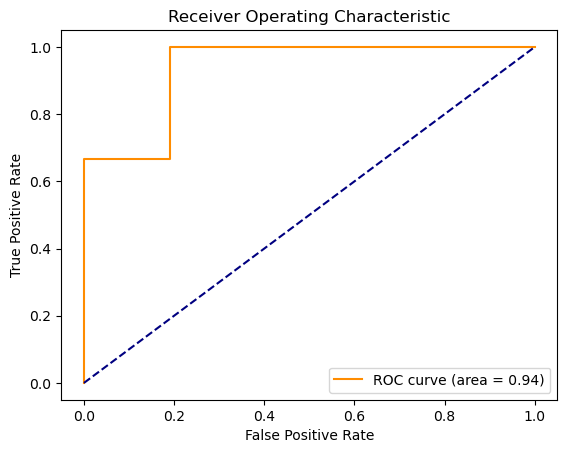

In [1196]:
# Get predicted probabilities for the positive class (Class 1)
y_prob = xg_clf.predict_proba(X_test)[:, 1]
# Compute ROC-AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"ROC-AUC: {roc_auc:.2f}")

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()


In [1207]:
pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),  # Apply SMOTE
    ('classifier', xg_clf)             # Use your XGBoost classifier
])

# Perform 5-fold cross-validation on the original data (X1, Y)
scores = cross_val_score(pipeline, X3, Y, cv=5, scoring='accuracy')  # Use desired scoring metric
print("Cross-Validation Accuracy Scores:", scores)
print("Mean CV Accuracy:", scores.mean())

Cross-Validation Accuracy Scores: [0.89473684 0.78947368 0.94736842 0.89473684 0.88888889]
Mean CV Accuracy: 0.8830409356725145


In [1208]:
feature2 = X3.columns
features2_df = pd.DataFrame(features2)
features2_df.to_csv("../result/features2.txt", index=False, header=False)

## mapping feature3 to affy snd gene_symbols in R

In [1209]:
X3_feature_T = X3.T
X3_feature_T['ensembl_gene_id'] = X3_feature_T.index
X3_feature_T[0:5]


TCGA.AA.3678.01A.01R.0905.07  TCGA.AA.3842.01A.01R.1022.07  \
ENSG00000279530                      3.848435                      0.000000   
ENSG00000238133                      6.734761                      2.060206   
ENSG00000172209                      2.886326                      2.060206   
ENSG00000287195                      0.962109                      0.000000   
ENSG00000241743                    132.771004                      2.060206   

                 TCGA.AA.3955.01A.02R.1022.07  TCGA.AA.3976.01A.01R.1022.07  \
ENSG00000279530                      0.000000                      0.000000   
ENSG00000238133                      3.728783                      8.305428   
ENSG00000172209                      3.728783                      0.000000   
ENSG00000287195                      0.000000                      0.000000   
ENSG00000241743                     20.508305                     30.453235   

                 TCGA.AA.A01C.01A.01R.A00A.07  TCGA.AA.A01X.01A.21R.A083.07  \
ENSG00000279530                      0.000000                      5.127765   
ENSG00000238133                      8.618963                     38.458240   
ENSG00000172209                      0.000000                      1.281941   
ENSG00000287195                      0.000000                      0.000000   
ENSG00000241743                     48.840788                     24.356885   

                 TCGA.AZ.6603.01A.11R.1839.07  TCGA.AZ.6608.01A.11R.1839.07  \
ENSG00000279530                      2.746377                      2.234643   
ENSG00000238133                     11.900966                     16.201160   
ENSG00000172209                      0.915459                      1.675982   
ENSG00000287195                      1.373188                      1.117321   
ENSG00000241743                     46.688405                     30.726338   

                 TCGA.CM.4750.01A.01R.1410.07  TCGA.CM.5341.01A.01R.1410.07  \
ENSG00000279530                      1.474093                      1.472358   
ENSG00000238133                    227.010375                      7.361788   
ENSG00000172209                      2.948187                      0.000000   
ENSG00000287195                      0.000000                      0.000000   
ENSG00000241743                     47.170987                     16.195933   

                 ...  TCGA.D5.7000.01A.11R.A32Z.07  \
ENSG00000279530  ...                      6.254125   
ENSG00000238133  ...                     32.312979   
ENSG00000172209  ...                      3.127063   
ENSG00000287195  ...                      1.042354   
ENSG00000241743  ...                     25.537677   

                 TCGA.F4.6569.01A.11R.1774.07  TCGA.F4.6806.01A.11R.1839.07  \
ENSG00000279530                      0.000000                      0.000000   
ENSG00000238133                    572.087480                     31.601655   
ENSG00000172209                      1.774832                      0.000000   
ENSG00000287195                      0.000000                      0.000000   
ENSG00000241743                      1.183221                    418.947656   

                 TCGA.F4.6808.01A.11R.1839.07  TCGA.F4.6856.01A.11R.1928.07  \
ENSG00000279530                      0.000000                      0.000000   
ENSG00000238133                    893.718942                      7.323245   
ENSG00000172209                      2.583003                      3.138533   
ENSG00000287195                      0.861001                      0.000000   
ENSG00000241743                     66.297070                     24.062090   

                 TCGA.G4.6306.01A.11R.1774.07  TCGA.G4.6628.01A.11R.1839.07  \
ENSG00000279530                      1.077285                      2.254922   
ENSG00000238133                    238.079926                      8.455958   
ENSG00000172209                      2.154569                      1.127461   
ENSG00000287195                      1.077285      

In [1210]:
mapped = pd.read_csv("../result/feature3_to_affy.csv", index_col=0).dropna()
print(len(mapped))
mapped[0:5]

38


ensembl_gene_id affy_hg_u133_plus_2
1  ENSG00000018869           241602_at
4  ENSG00000042781           207706_at
6  ENSG00000105321           206257_at
8  ENSG00000130300         221529_s_at
9  ENSG00000146006           206408_at

# GSE41258 testing

## retrain model with valid mapping features

In [1211]:
mapped_df = X3_feature_T.merge(mapped, on='ensembl_gene_id', how='inner')
mapped_df.index = mapped_df['affy_hg_u133_plus_2']
mapped_df.index.name = None
mapped_df = mapped_df.drop(columns=['affy_hg_u133_plus_2', 'ensembl_gene_id'])
mapped_df.head()

TCGA.AA.3678.01A.01R.0905.07  TCGA.AA.3842.01A.01R.1022.07  \
210928_at                       3.848435                      0.000000   
1558653_at                      6.734761                      2.060206   
244493_at                       2.886326                      2.060206   
221288_at                       2.886326                      2.060206   
237932_at                     132.771004                      2.060206   

            TCGA.AA.3955.01A.02R.1022.07  TCGA.AA.3976.01A.01R.1022.07  \
210928_at                       0.000000                      0.000000   
1558653_at                      3.728783                      8.305428   
244493_at                       3.728783                      0.000000   
221288_at                       3.728783                      0.000000   
237932_at                      20.508305                     30.453235   

            TCGA.AA.A01C.01A.01R.A00A.07  TCGA.AA.A01X.01A.21R.A083.07  \
210928_at                       0.000000                      5.127765   
1558653_at                      8.618963                     38.458240   
244493_at                       0.000000                      1.281941   
221288_at                       0.000000                      1.281941   
237932_at                      48.840788                     24.356885   

            TCGA.AZ.6603.01A.11R.1839.07  TCGA.AZ.6608.01A.11R.1839.07  \
210928_at                       2.746377                      2.234643   
1558653_at                     11.900966                     16.201160   
244493_at                       0.915459                      1.675982   
221288_at                       0.915459                      1.675982   
237932_at                      46.688405                     30.726338   

            TCGA.CM.4750.01A.01R.1410.07  TCGA.CM.5341.01A.01R.1410.07  ...  \
210928_at                       1.474093                      1.472358  ...   
1558653_at                    227.010375                      7.361788  ...   
244493_at                       2.948187                      0.000000  ...   
221288_at                       2.948187                      0.000000  ...   
237932_at                      47.170987                     16.195933  ...   

            TCGA.D5.6923.01A.11R.A32Z.07  TCGA.D5.7000.01A.11R.A32Z.07  \
210928_at                       2.089456                      6.254125   
1558653_at                     12.118847                     32.312979   
244493_at                       0.000000                      3.127063   
221288_at                       0.000000                      3.127063   
237932_at                       2.089456                     25.537677   

            TCGA.F4.6569.01A.11R.1774.07  TCGA.F4.6806.01A.11R.1839.07  \
210928_at                       0.000000                      0.000000   
1558653_at                    572.087480                     31.601655   
244493_at                       1.774832                      0.000000   
221288_at                       1.774832                      0.000000   
237932_at                       1.183221                    418.947656   

            TCGA.F4.6808.01A.11R.1839.07  TCGA.F4.6856.01A.11R.1928.07  \
210928_at                       0.000000                      0.000000   
1558653_at                    893.718942                      7.323245   
244493_at                       2.583003                      3.138533   
221288_at                       2.583003                      3.138533   
237932_at                      66.297070                     24.062090   

            TCGA.G4.6306.01A.11R.1774.07  TCGA.G4.6628.01A.11R.1839.07  \
210928_at                       1.077285                      2.254922   
1558653_at                    238.079926                      8.455958   
244493_at                       2.154569                      1.127461   
221288_at                       2.154569                      1.127461   
237932_at                      28.009403            

In [1212]:
X3_for_affy = mapped_df.T
X3_for_affy['Outcome'] = Y
X3_for_affy.head()

210928_at  1558653_at  244493_at  221288_at  \
TCGA.AA.3678.01A.01R.0905.07   3.848435    6.734761   2.886326   2.886326   
TCGA.AA.3842.01A.01R.1022.07   0.000000    2.060206   2.060206   2.060206   
TCGA.AA.3955.01A.02R.1022.07   0.000000    3.728783   3.728783   3.728783   
TCGA.AA.3976.01A.01R.1022.07   0.000000    8.305428   0.000000   0.000000   
TCGA.AA.A01C.01A.01R.A00A.07   0.000000    8.618963   0.000000   0.000000   

                               237932_at  215539_at  222214_at  238619_at  \
TCGA.AA.3678.01A.01R.0905.07  132.771004   0.000000   4.810544   0.962109   
TCGA.AA.3842.01A.01R.1022.07    2.060206   2.060206   4.120412   0.000000   
TCGA.AA.3955.01A.02R.1022.07   20.508305   0.000000   1.864391   0.000000   
TCGA.AA.3976.01A.01R.1022.07   30.453235   0.000000   0.000000   0.000000   
TCGA.AA.A01C.01A.01R.A00A.07   48.840788   0.000000   0.000000   0.000000   

                              241753_at  231497_at  ...  1562232_at  \
TCGA.AA.3678.01A.01R.0905.07   0.962109   4.810544  ...    9.621087   
TCGA.AA.3842.01A.01R.1022.07   0.000000   0.000000  ...    0.000000   
TCGA.AA.3955.01A.02R.1022.07   0.000000   0.000000  ...    0.000000   
TCGA.AA.3976.01A.01R.1022.07   0.000000   0.000000  ...    0.000000   
TCGA.AA.A01C.01A.01R.A00A.07   2.872988   0.000000  ...    2.872988   

                              1569794_at  1553325_at  1561033_at  214252_s_at  \
TCGA.AA.3678.01A.01R.0905.07    2.886326    1.924217    8.658978     2.886326   
TCGA.AA.3842.01A.01R.1022.07    0.000000    0.000000    2.060206     2.060206   
TCGA.AA.3955.01A.02R.1022.07    0.000000    1.864391   13.050740     0.000000   
TCGA.AA.3976.01A.01R.1022.07    0.000000    0.000000    2.768476     2.768476   
TCGA.AA.A01C.01A.01R.A00A.07    2.872988    2.872988    8.618963     2.872988   

                              206408_at  232096_x_at  224089_at  216273_at  \
TCGA.AA.3678.01A.01R.0905.07   4.810544     1.924217   1.924217   3.848435   
TCGA.AA.3842.01A.01R.1022.07  10.301030     0.000000   0.000000   0.000000   
TCGA.AA.3955.01A.02R.1022.07   7.457566     3.728783   1.864391   0.000000   
TCGA.AA.3976.01A.01R.1022.07   2.768476     0.000000   5.536952   0.000000   
TCGA.AA.A01C.01A.01R.A00A.07   0.000000     0.000000   2.872988   0.000000   

                              Outcome  
TCGA.AA.3678.01A.01R.0905.07        1  
TCGA.AA.3842.01A.01R.1022.07        1  
TCGA.AA.3955.01A.02R.1022.07        1  
TCGA.AA.3976.01A.01R.1022.07        1  
TCGA.AA.A01C.01A.01R.A00A.07        1  

[5 rows x 30 columns]

In [1213]:
train, test = train_test_split(X3_for_affy, test_size = 0.25, random_state = 42, stratify = X3_for_affy['Outcome'])
X_train, y_train, X_test, y_test = train.drop(['Outcome'], axis = 1), train['Outcome'], \
                                   test.drop(['Outcome'], axis = 1), test['Outcome']
print(y_train.shape, y_train.value_counts())
print(y_test.shape, y_test.value_counts())

(70,) Outcome
0    62
1     8
Name: count, dtype: int64
(24,) Outcome
0    21
1     3
Name: count, dtype: int64


In [1214]:
# SMOTE oversampling
smote_os = SMOTE(random_state = 42)
X_smote, y_smote = smote_os.fit_resample(X_train, y_train)
print("SMOTE...")
print(y_smote.value_counts())
print(X_smote.shape)

xg_clf = xgb.XGBClassifier(objective='binary:logistic')
xg_clf.fit(X_smote, y_smote)
y_pred = xg_clf.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print(classification_report(y_test, y_pred))

SMOTE...
Outcome
1    62
0    62
Name: count, dtype: int64
(124, 29)
Confusion Matrix:
[[20  1]
 [ 1  2]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.67      0.67      0.67         3

    accuracy                           0.92        24
   macro avg       0.81      0.81      0.81        24
weighted avg       0.92      0.92      0.92        24



In [1215]:
clinical = pd.read_csv("../data/GEO/GSE41258/clinical_GSE41258.csv", index_col=0 )
clinical[7:13]

Patient ID Gender  T  N  M group SSP.nearestCMS
GSM1012575      C0158      M  2  2  0    G1           CMS4
GSM1012617      C0283      M  2  1  0    G1           CMS4
GSM1012618      C0285      M  2  1  1    G1           CMS2
GSM1012308       2500      M  2  0  0    G2           CMS1
GSM1012312       2779      F  1  0  0    G2           CMS3
GSM1012313       2779      F  1  0  0    G2           CMS3

In [1216]:
print('Constructing STRING PPI network, %s' % time.ctime())
tmp_G = nx.Graph()
string_cutoff = 0.3

# Assuming edge.values is a NumPy array with columns: [node1, node2, score]
nodes1 = edge.values[:, 0]  # Gene identifiers
nodes2 = edge.values[:, 1]  # Gene identifiers
scores = edge.values[:, 2]

# Function to remove decimals from gene identifiers
def remove_decimal(node):
    return node.split('.')[0]  # Split at '.' and keep the part before it

# Add edges to the graph
for n1, n2, score in zip(nodes1, nodes2, scores):
    n1 = remove_decimal(n1)  # Remove decimal part from node1
    n2 = remove_decimal(n2)  # Remove decimal part from node2
    if score >= string_cutoff:
        tmp_G.add_edge(n1, n2)

# Find the largest connected component
LCC_genes = max(nx.connected_components(tmp_G), key=len)
G = tmp_G.subgraph(LCC_genes).copy()  # Create an independent subgraph
network_nodes = G.nodes()
network_edges = G.edges()
tmp_network_nodes = tmp_G.nodes()
tmp_network_edges = tmp_G.edges()

# Print graph details
print('Graph...')
print(f'Network nodes: {len(tmp_network_nodes)}')
print(f'Network edges: {len(tmp_network_edges)}\n')

print('Subgraph Largest Connected Components...')
print(f'Network nodes: {len(network_nodes)}')
print(f'Network edges: {len(network_edges)}')

# Optional: Display a few edges for verification
print('Sample edges:', list(network_edges)[:5])



NameError: name 'time' is not defined

In [ ]:
expres=pd.read_csv("../data/GEO/GSE41258/expression_mapped_GSE41258.csv", index_col=0)
filtered_features3 = [feature for feature in features3 if feature in expres.columns]
print(len(filtered_features3))
expres_filtered = expres[filtered_features3]
expres_filtered.head()


13


ENSG00000279530  ENSG00000172209  ENSG00000279544  \
GSM1012352            11.90             17.6             48.8   
GSM1012386             6.84             14.0             32.7   
GSM1012392            12.30             16.3             26.8   
GSM1012398             2.17             13.7             41.0   
GSM1012413            17.50             17.5             58.5   

            ENSG00000280069  ENSG00000042781  ENSG00000253910  \
GSM1012352             41.0             9.84            116.0   
GSM1012386             45.9             8.32             92.8   
GSM1012392             57.5             7.75            169.0   
GSM1012398             34.4             8.79            131.0   
GSM1012413             40.0             6.16             80.0   

            ENSG00000283208  ENSG00000146006  ENSG00000279541  \
GSM1012352             74.0             67.1             23.2   
GSM1012386             44.2             41.0             24.7   
GSM1012392             36.7             49.2             16.8   
GSM1012398             45.3             71.3             27.7   
GSM1012413             40.2             56.0             25.2   

            ENSG00000105321  ENSG00000130300  ENSG00000153989  ENSG00000183648  
GSM1012352            122.0            162.0            105.0              381  
GSM1012386             86.1            143.0            106.0              651  
GSM1012392             86.3            213.0             78.3              478  
GSM1012398            101.0            148.0            109.0              540  
GSM1012413            136.0            168.0            138.0              537

# korean cohort testing

In [1217]:
korean_clinical=pd.read_csv("../data/GEO/korean_cohort/korean_clinical_filtered.csv", index_col=0)
korean_clinical[0:5]

IDs     Sex  T  N  M group
PM.PM.1026.N.A1  PM-PM-1026-N    Male  2  1  0    G1
PM.PM.1030.N.A1  PM-PM-1030-N    Male  2  1  0    G1
PM.PM.1102.N.A1  PM-PM-1102-N  Female  2  1  0    G1
PM.PB.1140.N.A1  PM-PB-1140-N  Female  2  2  0    G1
PM.PB.1145.N.A1  PM-PB-1145-N  Female  2  1  0    G1

In [1218]:
Y = np.array(korean_clinical['group'].map({'G1': 1, 'G2': 0}))
print(Y)

[1 1 1 1 1 1 1 1 1 1 0 0 0 0]


In [1219]:
korean=pd.read_csv("../data/GEO/korean_cohort/CMCBSN_expectedcount_381.txt", sep='\t', index_col=0)
korean.index.name = None
korean.T

TSPAN6   TNMD    DPM1   SCYL3  C1orf112    FGR       CFH  \
PM-PM-1003-N-A1   4371.0   17.0   807.0  1460.0     213.0   72.0   5017.00   
PM-PM-1006-N-A1   4122.0   43.0  1072.0  1449.0     347.0  136.0   2527.65   
PM-PM-1007-N-A1   3922.0    6.0  1624.0  1465.0     428.0  164.0   7550.00   
PM-PM-1008-N-A1   8732.0   16.0  3055.0  1470.0     513.0  600.0   2185.91   
PM-PM-1012-N-A1   9768.0   59.0  1873.0  2036.0     320.0  165.0  12448.00   
...                  ...    ...     ...     ...       ...    ...       ...   
PM-PB-1154-T-A1   5756.0   57.0  1320.0  1356.0     837.0  160.0   2186.00   
PM-PB-1157-T-A1   6036.0   42.0  6373.0   894.0    1025.0  310.0   2977.87   
PM-PB-1158-T-A1  11780.0   76.0  3434.0  1394.0     659.0  230.0   5669.64   
PM-PB-1159-T-A1   7940.0  161.0  2465.0  1315.0    1224.0  162.0    657.00   
PM-PB-1160-T-A1  16489.0   62.0  3672.0  1299.0     751.0  253.0   2972.00   

                  FUCA2     GCLC    NFYA  ...  AL358472.5  BX005132.2  \
PM-PM-1003-N-A1  1911.0  1871.00  1293.0  ...         7.0         0.0   
PM-PM-1006-N-A1  2262.0  2118.00  1415.0  ...         3.0         0.0   
PM-PM-1007-N-A1  3755.0  2594.67  1171.0  ...         0.0         0.0   
PM-PM-1008-N-A1  3225.0  2507.14  2383.0  ...         9.0         0.0   
PM-PM-1012-N-A1  4732.0  3238.00  1290.0  ...         4.0         0.0   
...                 ...      ...     ...  ...         ...         ...   
PM-PB-1154-T-A1  6777.0  3423.00  1232.0  ...        12.0         0.0   
PM-PB-1157-T-A1  4793.0  5208.00  2217.0  ...        26.0         0.0   
PM-PB-1158-T-A1  3334.0  2568.00  1887.0  ...         8.0         0.0   
PM-PB-1159-T-A1  5828.0  4132.74  3422.0  ...        15.0         0.0   
PM-PB-1160-T-A1  5388.0  5166.00  2503.0  ...        10.0         0.0   

                 AL645728.2  AL163152.1  AL139254.3  AL591163.1  AL589702.1  \
PM-PM-1003-N-A1        5.00         0.0         0.0         0.0         0.0   
PM-PM-1006-N-A1        0.00         0.0         0.0         0.0         2.0   
PM-PM-1007-N-A1        3.21         0.0         2.0         0.0         0.0   
PM-PM-1008-N-A1        6.00         0.0         2.0         0.0         0.0   
PM-PM-1012-N-A1        6.00         0.0         0.0         0.0         0.0   
...                     ...         ...         ...         ...         ...   
PM-PB-1154-T-A1        0.00         0.0         0.0         0.0         0.0   
PM-PB-1157-T-A1        5.00         0.0         2.0         0.0         6.0   
PM-PB-1158-T-A1        1.00         0.0         1.0         0.0         0.0   
PM-PB-1159-T-A1        0.00         0.0         4.0         0.0         0.0   
PM-PB-1160-T-A1        1.00         0.0         0.0         0.0         0.0   

                 AC068587.10  AL034417.4  AL513220.1  
PM-PM-1003-N-A1         0.00        11.0         0.0  
PM-PM-1006-N-A1         0.00         8.0         0.0  
PM-PM-1007-N-A1         0.00        10.0         0.0  
PM-PM-1008-N-A1         0.00        15.0         0.0  
PM-PM-1012-N-A1         0.00         6.0         0.0  
...                      ...         ...         ...  
PM-PB-1154-T-A1         0.00         0.0         0.0  
PM-PB-1157-T-A1         0.00        14.0         0.0  
PM-PB-1158-T-A1         5.86         8.0         0.0  
PM-PB-1159-T-A1         0.00        18.0         0.0  
PM-PB-1160-T-A1         0.00        12.0         0.0  

[381 rows x 56609 columns]

## Domain adaptation correction( more on NN) are there ways for ML
combat: box plot (each sample box plot of these 463 site)


In [1220]:
TCGA_probes = data.T[1:152][selected_features_3]
GSM_probes = data.T[152:222][selected_features_3]
TCGA_probes

NameError: name 'selected_features_3' is not defined

In [ ]:
GSM_probes

cg03995238  cg15255859  cg19740287  \
GSM5019886_200400320137_R03C01    0.299735    0.019616    0.088030   
GSM5019895_200400320150_R02C01    0.179007    0.046365    0.076116   
GSM5019903_200486890003_R01C02    0.219536    0.012013    0.068525   
GSM5019911_200400320118_R06C02    0.138726    0.033177    0.092662   
GSM5019913_200078650042_R03C01    0.156988    0.022338    0.069837   
...                                    ...         ...         ...   
GSM5020021_3998909012_R04C01      0.374373    0.629999    0.311515   
GSM5020022_3998909012_R05C01      0.175115    0.010928    0.090536   
GSM5020024_3998909012_R02C02      0.172088    0.032239    0.086591   
GSM5020026_3998909012_R04C02      0.180992    0.004852    0.105941   
GSM5020027_3998909012_R05C02      0.476347    0.633881    0.512836   

                                cg23061435  cg03182908  cg03229887  \
GSM5019886_200400320137_R03C01    0.452071    0.770299    0.024115   
GSM5019895_200400320150_R02C01    0.407839    0.526241    0.032714   
GSM5019903_200486890003_R01C02    0.347445    0.533068    0.030335   
GSM5019911_200400320118_R06C02    0.194061    0.684547    0.044817   
GSM5019913_200078650042_R03C01    0.265859    0.535319    0.043651   
...                                    ...         ...         ...   
GSM5020021_3998909012_R04C01      0.505749    0.570958    0.026019   
GSM5020022_3998909012_R05C01      0.354302    0.582099    0.026728   
GSM5020024_3998909012_R02C02      0.302847    0.422457    0.012753   
GSM5020026_3998909012_R04C02      0.340053    0.585553    0.012109   
GSM5020027_3998909012_R05C02      0.500197    0.658903    0.022199   

                                cg04605084  cg05766761  cg11815448  \
GSM5019886_200400320137_R03C01    0.022005    0.109418    0.094338   
GSM5019895_200400320150_R02C01    0.020869    0.119733    0.090781   
GSM5019903_200486890003_R01C02    0.016808    0.076792    0.075062   
GSM5019911_200400320118_R06C02    0.020296    0.113921    0.098193   
GSM5019913_200078650042_R03C01    0.027460    0.102183    0.084859   
...                                    ...         ...         ...   
GSM5020021_3998909012_R04C01      0.016808    0.091975    0.086513   
GSM5020022_3998909012_R05C01      0.015684    0.118875    0.113398   
GSM5020024_3998909012_R02C02      0.013035    0.092311    0.100246   
GSM5020026_3998909012_R04C02      0.018116    0.123904    0.107285   
GSM5020027_3998909012_R05C02      0.015651    0.111727    0.103093   

                                cg12497298  ...  cg16613143  cg17903246  \
GSM5019886_200400320137_R03C01    0.107546  ...    0.011769    0.023101   
GSM5019895_200400320150_R02C01    0.114004  ...    0.013800    0.022421   
GSM5019903_200486890003_R01C02    0.104610  ...    0.019843    0.018441   
GSM5019911_200400320118_R06C02    0.121986  ...    0.020150    0.019299   
GSM5019913_200078650042_R03C01    0.111094  ...    0.023337    0.019674   
...                                    ...  ...         ...         ...   
GSM5020021_3998909012_R04C01      0.101061  ...    0.016655    0.019624   
GSM5020022_3998909012_R05C01      0.122058  ...    0.015446    0.013712   
GSM5020024_3998909012_R02C02      0.107585  ...    0.006950    0.017461   
GSM5020026_3998909012_R04C02      0.125719  ...    0.008968    0.019005   
GSM5020027_3998909012_R05C02      0.100666  ...    0.014060    0.018304   

                                cg24598678  cg10119679  cg03410359  \
GSM5019886_200400320137_R03C01    0.244387    0.217391    0.082693   
GSM5019895_200400320150_R02C01    0.196796    0.234475    0.235805   
GSM5019903_200486890003_R01C02    0.175092    0.176400    0.064252   
GSM5019911_200400320118_R06C02    0.220716    0.212648    0.474017   
GSM5019913_200078650042_R03C01    0.159836    0.271077    0.073727   
...                                    ...         ...         ...   
GSM5020021_3998909012_R04C01      0.104613    0.177758    0.088173   
GSM5020022_3998909012_R05C01      0.169464    0.

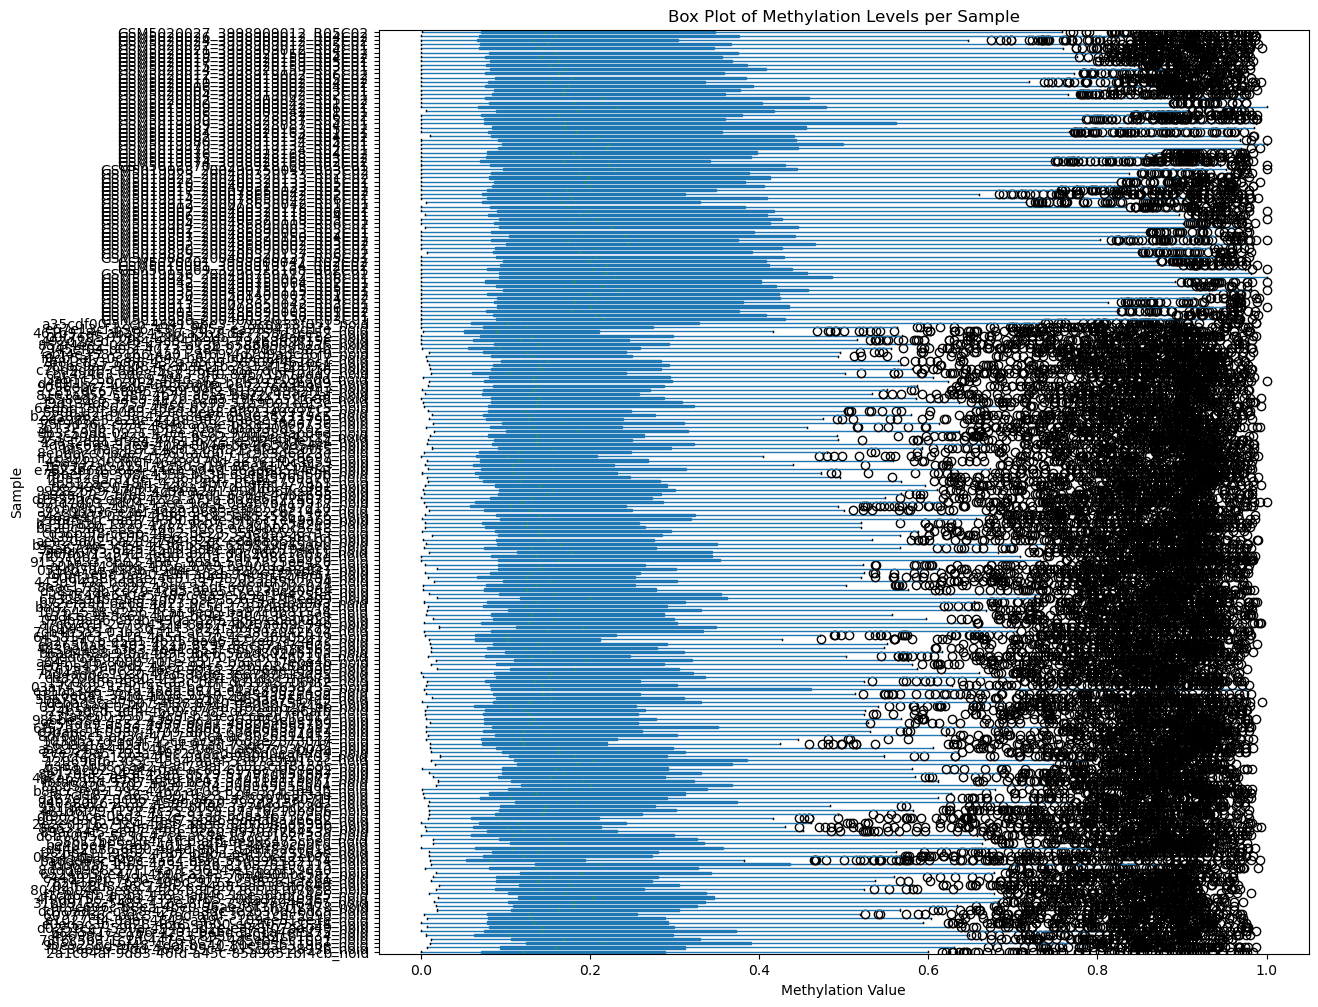

In [ ]:
all_T = data.T[selected_features_3].T

# Plot the box plot for each sample
plt.figure(figsize=(12, 12))
all_T.boxplot(vert=False, grid=False, patch_artist=True)
plt.title("Box Plot of Methylation Levels per Sample")
plt.xlabel("Methylation Value")
plt.ylabel("Sample")
plt.show()

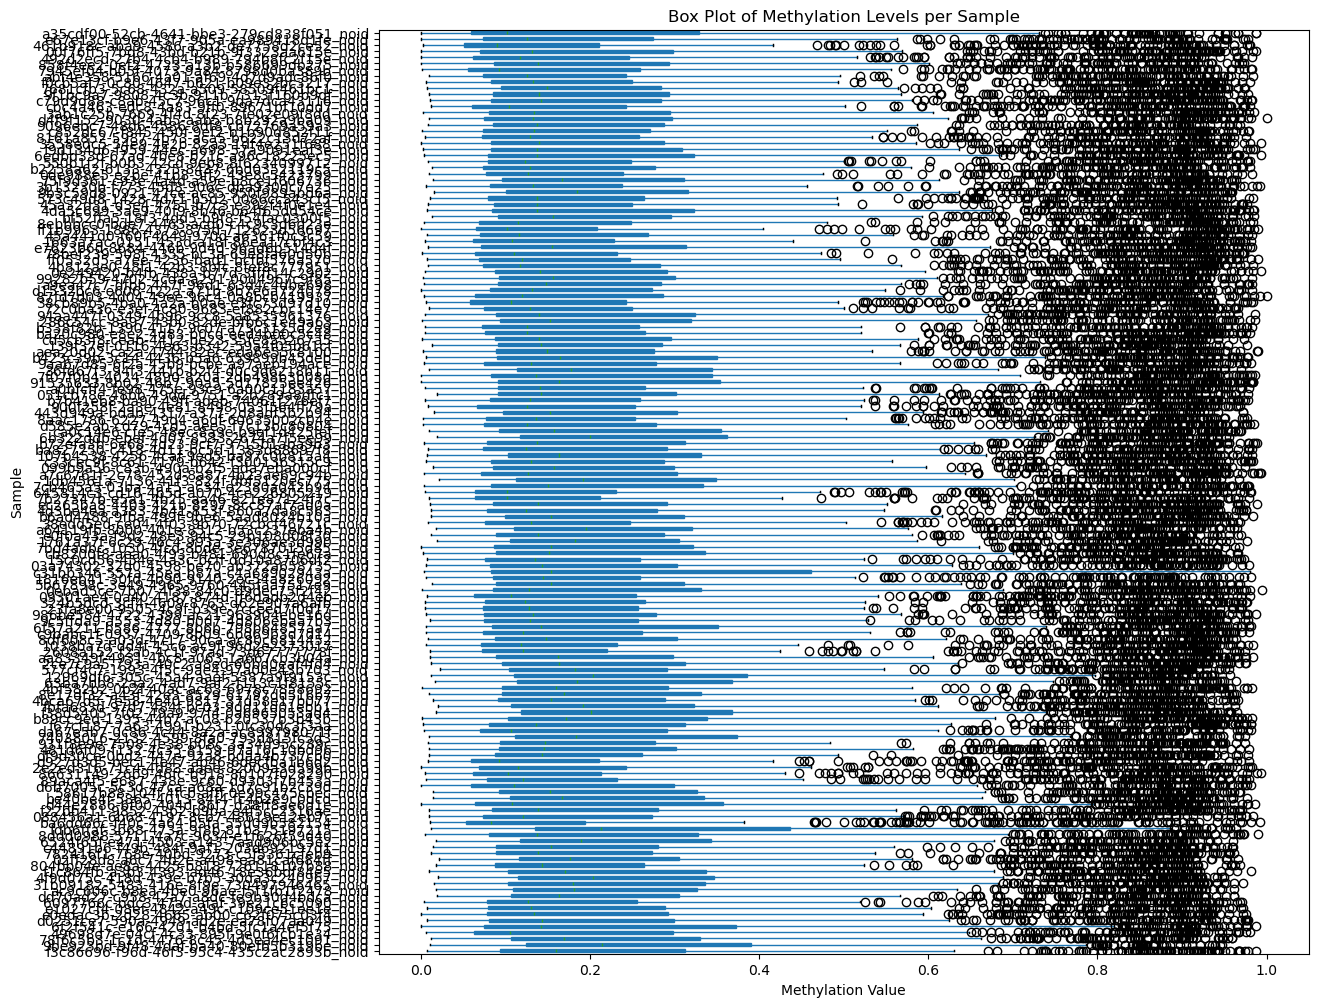

In [ ]:
TCGA_probes_T = TCGA_probes.T

# Plot the box plot for each sample
plt.figure(figsize=(12, 12))
TCGA_probes_T.boxplot(vert=False, grid=False, patch_artist=True)
plt.title("Box Plot of Methylation Levels per Sample")
plt.xlabel("Methylation Value")
plt.ylabel("Sample")
plt.show()

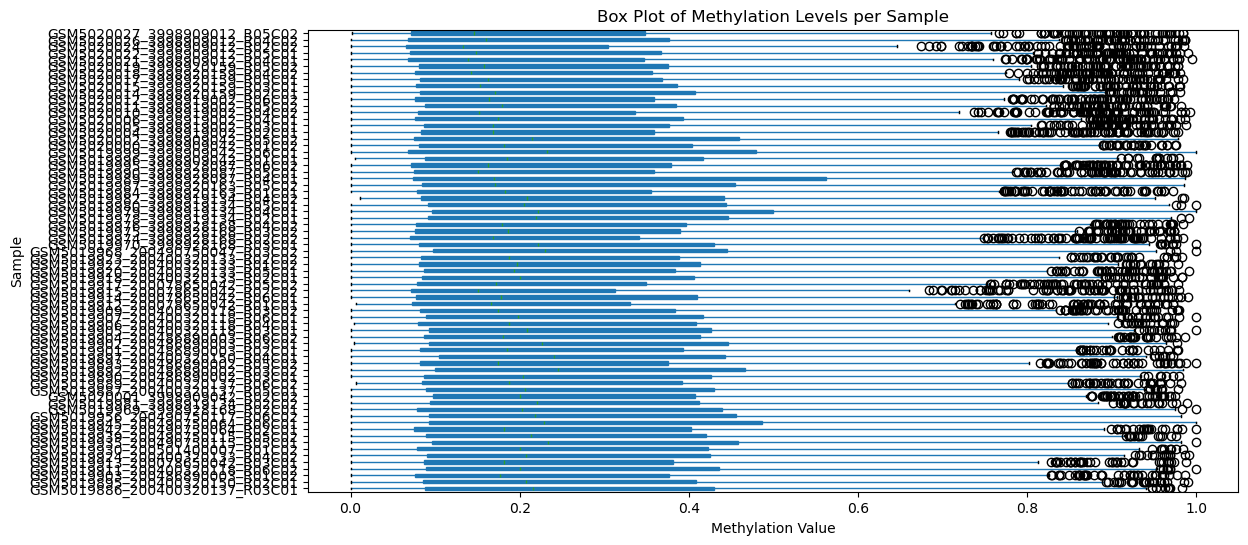

In [ ]:
GSM_probes_T = GSM_probes.T

# Plot the box plot for each sample
plt.figure(figsize=(12, 6))
GSM_probes_T.boxplot(vert=False, grid=False, patch_artist=True)
plt.title("Box Plot of Methylation Levels per Sample")
plt.xlabel("Methylation Value")
plt.ylabel("Sample")
plt.show()

In [ ]:
combined_probes = pd.concat([TCGA_probes,GSM_probes], axis=0)


In [ ]:
combined_probes.fillna(combined_probes.mean(), inplace=True)  

In [ ]:
combined_probes.to_csv("data_for_COMBAT.csv", index=True)

## do COMBAT in R

In [ ]:
after = pd.read_csv("data_aft_COMBAT.csv", index_col=0)
after

cg03995238  cg15255859  cg19740287  \
2a1c84af-9d83-46fd-a45c-85a9651bf4cb_noid    0.302640    0.393259    0.350947   
f3c86696-f96d-46f3-95c4-435c2ac2893b_noid    0.434909    0.631251    0.464675   
9be923bd-9f48-4daf-ba40-80efb5b319be_noid    0.300940    0.345150    0.258056   
78f6c5b3-1c1d-4476-8c45-4d5ea4ec1091_noid    0.381627    0.289926    0.200109   
49698d7e-04cf-4c33-895f-9e0f6fcb1e34_noid    0.389814    0.545644    0.396537   
...                                               ...         ...         ...   
GSM5020021_3998909012_R04C01                 0.374373    0.629999    0.311515   
GSM5020022_3998909012_R05C01                 0.175115    0.010928    0.090536   
GSM5020024_3998909012_R02C02                 0.172088    0.032239    0.086591   
GSM5020026_3998909012_R04C02                 0.180992    0.004852    0.105941   
GSM5020027_3998909012_R05C02                 0.476347    0.633881    0.512836   

                                           cg23061435  cg03182908  cg03229887  \
2a1c84af-9d83-46fd-a45c-85a9651bf4cb_noid    0.338716    0.520977    0.015989   
f3c86696-f96d-46f3-95c4-435c2ac2893b_noid    0.474501    0.291099    0.021987   
9be923bd-9f48-4daf-ba40-80efb5b319be_noid    0.427128    0.753480    0.033973   
78f6c5b3-1c1d-4476-8c45-4d5ea4ec1091_noid    0.490478    0.633100    0.030668   
49698d7e-04cf-4c33-895f-9e0f6fcb1e34_noid    0.408396    0.495231    0.018392   
...                                               ...         ...         ...   
GSM5020021_3998909012_R04C01                 0.505749    0.570958    0.026019   
GSM5020022_3998909012_R05C01                 0.354302    0.582099    0.026728   
GSM5020024_3998909012_R02C02                 0.302847    0.422457    0.012753   
GSM5020026_3998909012_R04C02                 0.340053    0.585553    0.012109   
GSM5020027_3998909012_R05C02                 0.500197    0.658903    0.022199   

                                           cg04605084  cg05766761  cg11815448  \
2a1c84af-9d83-46fd-a45c-85a9651bf4cb_noid    0.012941    0.110202    0.092736   
f3c86696-f96d-46f3-95c4-435c2ac2893b_noid    0.019560    0.124958    0.103852   
9be923bd-9f48-4daf-ba40-80efb5b319be_noid    0.027192    0.142040    0.097162   
78f6c5b3-1c1d-4476-8c45-4d5ea4ec1091_noid    0.025826    0.115682    0.101901   
49698d7e-04cf-4c33-895f-9e0f6fcb1e34_noid    0.016225    0.078331    0.087308   
...                                               ...         ...         ...   
GSM5020021_3998909012_R04C01                 0.016808    0.091975    0.086513   
GSM5020022_3998909012_R05C01                 0.015684    0.118875    0.113398   
GSM5020024_3998909012_R02C02                 0.013035    0.092311    0.100246   
GSM5020026_3998909012_R04C02                 0.018116    0.123904    0.107285   
GSM5020027_3998909012_R05C02                 0.015651    0.111727    0.103093   

                                           cg12497298  ...  cg16613143  \
2a1c84af-9d83-46fd-a45c-85a9651bf4cb_noid    0.104951  ...    0.011920   
f3c86696-f96d-46f3-95c4-435c2ac2893b_noid    0.129695  ...    0.013181   
9be923bd-9f48-4daf-ba40-80efb5b319be_noid    0.129271  ...    0.010909   
78f6c5b3-1c1d-4476-8c45-4d5ea4ec1091_noid    0.108829  ...    0.016639   
49698d7e-04cf-4c33-895f-9e0f6fcb1e34_noid    0.094829  ...    0.010072   
...                                               ...  ...         ...   
GSM5020021_3998909012_R04C01                 0.101061  ...    0.016655   
GSM5020022_3998909012_R05C01                 0.122058  ...    0.015446   
GSM5020024_3998909012_R02C02                 0.107585  ...    0.006950   
GSM5020026_3998909012_R04C02                 0.125719  ...    0.008968   
GSM5020027_3998909012_R05C02                 0.100666  ...    0.014060   

                                           cg17903246  cg24598678  cg10119679  \
2a1c84af-9d83-46fd-a45c-85a9651bf4cb_noid    0.013887    0.157289    0.229592   
f3c86696-f96d-46f3-95c4-435c2ac2893b_noid    0.015502    0.181178    0.23

In [ ]:
TCGA_aft = after[0:152]
GSM_aft = after[152:222]

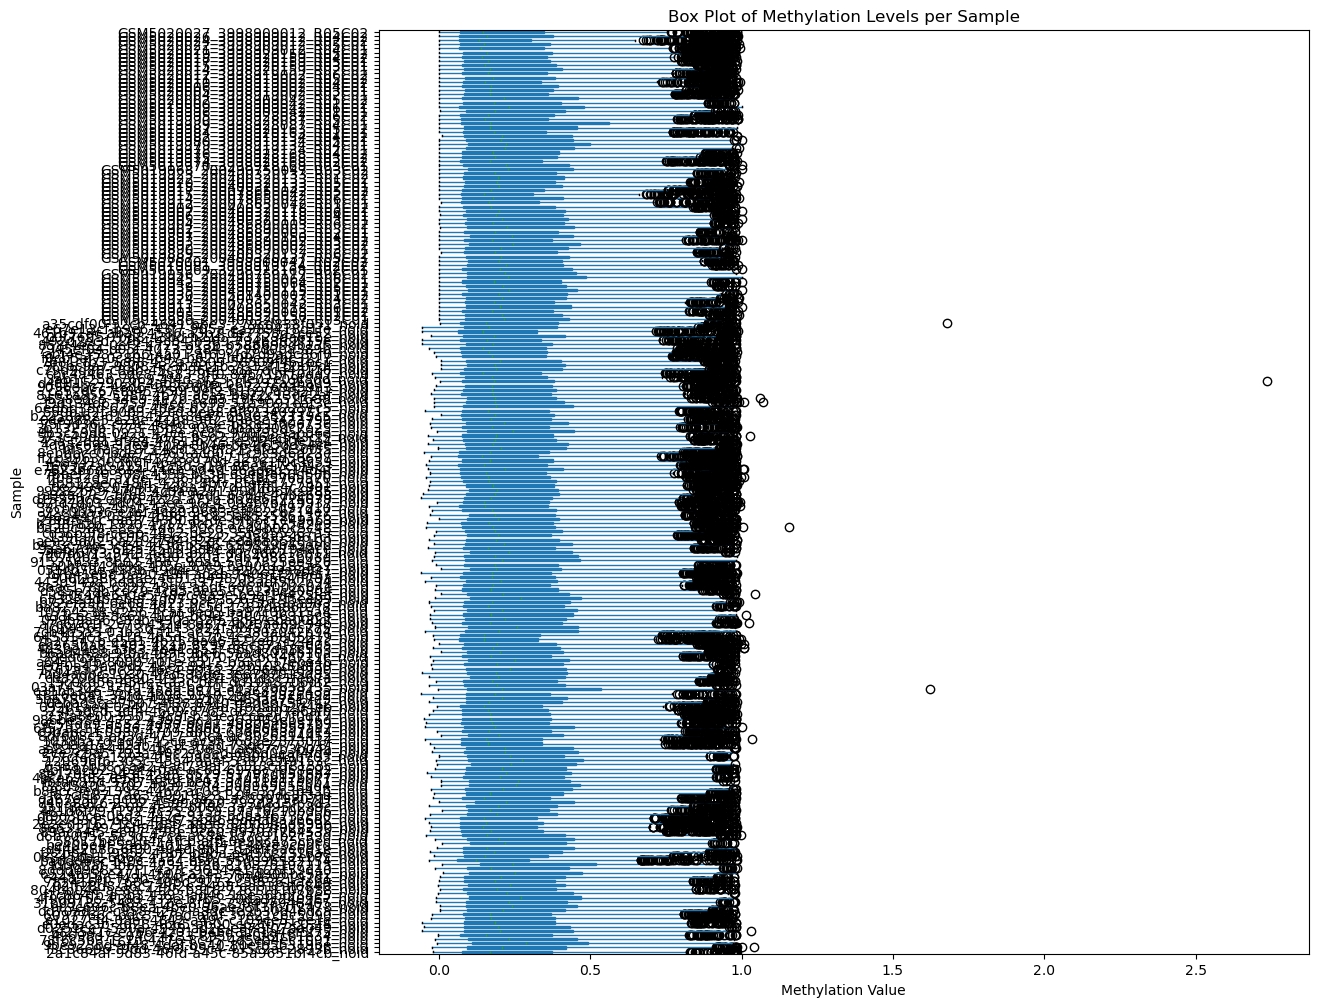

In [ ]:
after_T = after.T

# Plot the box plot for each sample
plt.figure(figsize=(12, 12))
after_T.boxplot(vert=False, grid=False, patch_artist=True)
plt.title("Box Plot of Methylation Levels per Sample")
plt.xlabel("Methylation Value")
plt.ylabel("Sample")
plt.show()

In [ ]:
xg_clf = xgb.XGBClassifier()
xg_clf.fit(X_smoteborder, y_smoteborder)
y_pred = xg_clf.predict(X_train)
print(y_pred)

y_pred = xg_clf.predict(TCGA_aft)
print(y_pred)


[0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


In [ ]:
y_train_pred = xg_clf.predict(X_train)
print("Training Accuracy: ", accuracy_score(y_train, y_train_pred))
y_test_pred = xg_clf.predict(X_test)
print("Training Accuracy: ", accuracy_score(y_test, y_test_pred))

Training Accuracy:  1.0
Training Accuracy:  0.7777777777777778
